## GP Parameters

In [ ]:
POPULATION_SIZE = 100
MAX_GENERATIONS = 100
HALL_OF_FAME_SIZE = 10

p_crossover_values = [0.4, 0.6, 0.7, 0.8, 0.9]
p_mutation_values = [0.01, 0.1, 0.3]

MAX_FITNESS = 1.0

# penalty value for nan or inf in fitness function
NAN_PENALTY = -1
INF_PENALTY = -1
TYPE_ERROR_PENALTY = -1

THRESHOLD = 0.0000000000010
N_RUNS = 20
N_GUESSES = 3

MIN_TREE_HEIGHT = 2                # 2 to 4
MAX_TREE_HEIGHT = 6                # 6 to 10
LIMIT_TREE_HEIGHT = 17            # Maximum tree height after crossover/mutation"
MUT_MIN_TREE_HEIGHT = 0           # Minimal height for a tree used in mutation
MUT_MAX_TREE_HEIGHT = 2           # Maximum height for a tree used in mutation

# Here I am thresholding the delta of the validation error to determine if we should stop the run
# I am using two different thresholds, one for the first run and one for all other runs because
# As you the runs continue the delta increases, and I found keep the first run strict while allowing
# a slightly more leniant threshold for all other runs worked well.
VALIDATION_ERROR_DELTA_THRESHOLD_FIRST_RUN = 0.03
VALIDATION_ERROR_DELTA_THRESHOLD_ALL_OTHER_RUNS = 0.05

MIN_VALIDATION_ERROR_THRESHOLD = 0.75

## Preprocessing and Other Parameters

In [ ]:
# 'onehot' 'catboost 'frequency' 'target'
ENCODING_METHOD = 'target'
TEST_TRAIN_SPLIT = 0.2

## Introduction

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)

In [ ]:
import os.path
import time
time.sleep(5)  # Pause for 5 seconds, otherwise there can be errors
#PATH = '/content/drive/MyDrive/grape/'
PATH = 'F:/Nextcloud/University/Sem1/CS6271 EVOLUTIONARY COMPUTATION AND HUMANOID ROBOTICS'
if os.path.exists(PATH):
    print('grape directory already exists')
else:
    os.chdir('/content/drive/MyDrive/')
    #!git clone https://github.com/UL-BDS/grape.git
    !git clone https://github.com/bdsul/grape.git
    print('Cloning grape in your Drive')

os.chdir(PATH)

grape directory already exists


Predict whether income exceeds $50K/yr based on census data. This is a shorter version of the also known as "Census Income" dataset (donated on 4/30/1996).

## GRAPE

<div>
<img src="https://drive.google.com/uc?export=view&id=1hw43Oi3lGTCkspQ0ged2bZB8q2EpcPhz" width="150"/>
</div>

GRammatical Algorithms in Python for Evolution (GRAPE)


In [ ]:
!git clone https://github.com/conorlime/CS6271

fatal: destination path 'CS6271' already exists and is not an empty directory.


In [ ]:
cd CS6271/

F:\Nextcloud\University\Sem1\CS6271 EVOLUTIONARY COMPUTATION AND HUMANOID ROBOTICS\CS6271


In [ ]:
ls -l|grep drw

File Not Found
'grep' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
cd Utilities/

F:\Nextcloud\University\Sem1\CS6271 EVOLUTIONARY COMPUTATION AND HUMANOID ROBOTICS\CS6271\Utilities


In [ ]:
!pip install deap

In [ ]:
!pip install pandas

In [ ]:
!pip install category_encoders

## Libraries

In [ ]:
# Libraries
!pip install deap
!pip install pandas
!pip install scikit-learn
!pip install matplotlib
!pip install networkx

from elitism import eaSimpleWithElitism


from os import path
from deap import creator, base, tools
import random
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import operator
import math
import random

import numpy

from deap import algorithms as deap_algorithms
from deap import base
from deap import creator
from deap import tools
from deap import gp

import matplotlib.pyplot as plt

import itertools
import networkx as nx

from os import path
import pandas as pd
import numpy as np

import time

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

from IPython.display import display, HTML

## Dataset

Class:

income: >50K, <=50K.


Listing of features:

age: continuous.

workclass: categorical (Private, Self-emp-not-inc, Local-gov, State-gov).

education: categorical (Bachelors, Some-college, HS-grad, Masters, Doctorate).

marital-status: categorical (Married-civ-spouse, Divorced, Never-married).

relationship: categorical (Wife, Husband, Not-in-family, Other-relative).

race: categorical (White, Asian-Pac-Islander, Black).

sex: categorical (Female, Male).

capital-gain: continuous.

capital-loss: continuous.

hours-per-week: continuous.

native-country: categorical (United-States, Others).


### Load the dataset

In [ ]:
# Suppressing Warnings:
import warnings
warnings.filterwarnings("ignore")

Clone the GRAPE repository at first because the dataset to be used is already there.

In [ ]:

import os
# Get the library from our BDS research Group
# copy the path from your drive
PATH = 'F:/Nextcloud/University/Sem1/CS6271 EVOLUTIONARY COMPUTATION AND HUMANOID ROBOTICS/grape/'

# check if 'grape' already exists
if os.path.exists(PATH):
    print('grape directory already exists')
else:
    %cd F:/Nextcloud/University/Sem1/CS6271 EVOLUTIONARY COMPUTATION AND HUMANOID ROBOTICS
    !git clone https://github.com/bdsul/grape.git
    print('Cloning grape in your Drive')

# change directory to 'grape'
%cd /content/drive/MyDrive/grape/

grape directory already exists
[WinError 3] The system cannot find the path specified: '/content/drive/MyDrive/grape/'
F:\Nextcloud\University\Sem1\CS6271 EVOLUTIONARY COMPUTATION AND HUMANOID ROBOTICS\CS6271\Utilities


Now you have a grape folder in your Drive account.

Upload the files adult_training.csv and adult_test.csv to the folder grape/datasets in your Drive before running the next cells.

### Train set

In [ ]:
train_file = 'datasets/adult_training.csv'

# Preprocessing the data

## Split the dataset into a training set and a test set


In [ ]:
# load train set
df_train = pd.read_csv(PATH+train_file)
df_train.head()

,age,workclass,education,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,28,Private,Bachelors,Never-married,Not-in-family,White,Male,0,0,40,United-States,<=50K
1,34,Self-emp-not-inc,Bachelors,Married-civ-spouse,Husband,Black,Male,0,1887,48,United-States,>50K
2,32,Private,Bachelors,Never-married,Not-in-family,Black,Female,0,0,40,United-States,<=50K
3,46,Private,Bachelors,Divorced,Not-in-family,White,Male,0,0,40,Others,<=50K
4,44,Private,Bachelors,Married-civ-spouse,Husband,White,Male,0,0,50,United-States,>50K


In [ ]:
df_train.describe()

,age,capital-gain,capital-loss,hours-per-week
count,5200.000000,5200.00000,5200.000000,5200.000000
mean,39.688077,1059.89500,109.486346,42.786538
std,11.973363,6687.36408,442.694051,10.937644
min,17.000000,0.00000,0.000000,1.000000
25%,30.000000,0.00000,0.000000,40.000000
50%,38.000000,0.00000,0.000000,40.000000
75%,48.000000,0.00000,0.000000,48.000000
max,90.000000,99999.00000,2559.000000,99.000000


I originally had the test set as 30% of the dataset, but I changed it to 20% to see if it would improve the accuracy of the model.

In [ ]:
#Create class labels
y = np.where(df_train['income'] == '>50K', 1, 0)

#Drop the 'income' column to create the feature matrix X
X = df_train.drop(['income'], axis=1)

#Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_TRAIN_SPLIT, stratify=y)

You should represent the outputs with 0 where the income is smaller or equal to 50K and with 1 if it is greater than 50K.

Follow exactly this approach, because the test targets are represented like this in the competition.

In [ ]:
X_test.head()

,age,workclass,education,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
3175,46,Private,Bachelors,Married-civ-spouse,Husband,White,Male,0,1902,40,United-States
4301,46,Private,HS-grad,Married-civ-spouse,Husband,Black,Male,0,1902,40,United-States
2896,59,Private,HS-grad,Married-civ-spouse,Husband,White,Male,0,0,40,United-States
4097,35,State-gov,HS-grad,Married-civ-spouse,Husband,Black,Male,0,0,40,United-States
1718,26,Private,Some-college,Never-married,Not-in-family,White,Female,0,0,40,United-States


In [ ]:
X_train.head()

,age,workclass,education,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
2681,28,Local-gov,Doctorate,Divorced,Not-in-family,White,Female,0,0,40,United-States
4897,39,Self-emp-not-inc,HS-grad,Married-civ-spouse,Husband,White,Male,0,0,40,United-States
93,53,Local-gov,HS-grad,Married-civ-spouse,Husband,White,Male,0,0,40,United-States
1502,22,Local-gov,Some-college,Never-married,Not-in-family,Asian-Pac-Islander,Female,0,0,40,Others
4595,39,Private,Some-college,Never-married,Not-in-family,White,Male,0,0,40,United-States


In [ ]:
y_test

array([1, 1, 0, ..., 0, 1, 1])

### Kaggle Test set

In [ ]:
kaggle_test_file = 'datasets/adult_test.csv'

In [ ]:
# load test set
df_kaggle_test = pd.read_csv(PATH+kaggle_test_file)
df_kaggle_test.head()

,age,workclass,education,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,33,Private,HS-grad,Never-married,Not-in-family,White,Male,3325,0,50,United-States
1,58,Private,HS-grad,Married-civ-spouse,Husband,White,Male,0,0,40,United-States
2,30,Self-emp-not-inc,HS-grad,Married-civ-spouse,Husband,White,Male,0,0,60,United-States
3,26,Private,Some-college,Never-married,Not-in-family,White,Female,0,0,20,United-States
4,43,State-gov,HS-grad,Never-married,Not-in-family,White,Male,0,0,60,United-States


In [ ]:
df_kaggle_test.describe()

,age,capital-gain,capital-loss,hours-per-week
count,10402.000000,10402.000000,10402.000000,10402.000000
mean,39.811575,1280.969237,106.101038,42.749567
std,12.063746,7826.438595,438.826968,11.200949
min,18.000000,0.000000,0.000000,1.000000
25%,30.000000,0.000000,0.000000,40.000000
50%,38.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,48.000000
max,90.000000,99999.000000,3683.000000,99.000000


Convert the datasets to NumPy to easily use them.

In [ ]:
# data features
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

In [ ]:
print(type(X_train))
print(X_train.shape)

<class 'numpy.ndarray'>
(4160, 11)


## Preprocessing function
For preprocessing, we will encode the categorical features. This will convert them into a format suitable for our model.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from category_encoders import TargetEncoder, CatBoostEncoder

def preprocess_data(X, y_train=None, is_train_data=True, scaler=None, encoder=None, encoding_method='target'):
    #Convert the numpy array to a DataFrame
    if isinstance(X, np.ndarray):
        X_df = pd.DataFrame(X, columns=[
            'age', 'workclass', 'education', 'marital-status',
            'relationship', 'race', 'sex', 'capital-gain',
            'capital-loss', 'hours-per-week', 'native-country',
        ])
    else:
        X_df = X.copy()

    #Handle missing values. For simplicity, we'll drop them
    X_df.dropna(inplace=True)

    #Feature Engineering: Net Capital
    X_df['net_capital'] = X_df['capital-gain'] - X_df['capital-loss']

    #Drop 'capital-gain' and 'capital-loss' after calculating 'net_capital'
    X_df.drop(['capital-gain', 'capital-loss'], axis=1, inplace=True)

    #Feature Engineering: Age Groups with numerical encoding
    #Bins and labels
    bins = [0, 20, 65, np.inf]
    labels = [-1, 1, 2]  # young=-1, adult=1, retired=2
    X_df['age_group'] = pd.cut(X_df['age'], bins=bins, labels=labels)

    #Define numerical columns (excluding 'capital-gain' and 'capital-loss')
    numerical_cols = ['hours-per-week', 'net_capital']

    #Normalizing Numerical Columns
    if is_train_data:
        scaler = StandardScaler()
        scaler.fit(X_df[numerical_cols])
    X_df[numerical_cols] = scaler.transform(X_df[numerical_cols])

    #Exclude numerical columns from categorical columns
    categorical_cols = [col for col in X_df.columns if col not in numerical_cols + ['age', 'age_group']]


    if encoding_method == 'target':
        if is_train_data:
            encoder = TargetEncoder()
            X_df[categorical_cols] = encoder.fit_transform(X_df[categorical_cols], y_train)
        else:
            X_df[categorical_cols] = encoder.transform(X_df[categorical_cols])
        X_df.drop(['age'], axis=1, inplace=True)
    elif encoding_method == 'catboost':
        if is_train_data:
            encoder = CatBoostEncoder()
            X_df[categorical_cols] = encoder.fit_transform(X_df[categorical_cols], y_train)
        else:
            X_df[categorical_cols] = encoder.transform(X_df[categorical_cols])
        X_df.drop(['age'], axis=1, inplace=True)

    return X_df, scaler, encoder


Here we are checking to make sure our train and test data looks the same

In [ ]:
print(X_train.shape)
print(X_test.shape)

(4160, 11)
(1040, 11)


Added in some more advanced encoders to see if they are more effective than the one-hot encoder. I tried the target encoder and the catboost encoder.

In [ ]:
X_train_encoded, scaler, encoder = preprocess_data(X_train, y_train=y_train, is_train_data=True, encoding_method=ENCODING_METHOD)
X_test_encoded, _, _ = preprocess_data(X_test, is_train_data=False, scaler=scaler, encoder=encoder, encoding_method=ENCODING_METHOD)

In [ ]:
X_train_encoded

,workclass,education,marital-status,relationship,race,sex,hours-per-week,native-country,net_capital,age_group
0,0.410345,0.748975,0.142259,0.099215,0.342804,0.214286,-0.260962,0.335602,-0.142643,1
1,0.304245,0.219154,0.474262,0.469283,0.342804,0.373342,-0.260962,0.335602,-0.142643,1
2,0.410345,0.219154,0.474262,0.469283,0.342804,0.373342,-0.260962,0.335602,-0.142643,1
3,0.410345,0.279159,0.071154,0.099215,0.364341,0.214286,-0.260962,0.332353,-0.142643,1
4,0.330221,0.279159,0.071154,0.099215,0.342804,0.373342,-0.260962,0.335602,-0.142643,1
...,...,...,...,...,...,...,...,...,...,...
4155,0.330221,0.456693,0.071154,0.099215,0.342804,0.373342,-0.260962,0.335602,-0.142643,1
4156,0.330221,0.219154,0.474262,0.530035,0.342804,0.214286,-0.260962,0.335602,-0.142643,1
4157,0.330221,0.219154,0.474262,0.469283,0.230000,0.373342,0.657016,0.335602,-0.142643,1
4158,0.330221,0.219154,0.071154,0.099215,0.342804,0.373342,0.840612,0.335602,-0.142643,1


In [ ]:
X_test_encoded

,workclass,education,marital-status,relationship,race,sex,hours-per-week,native-country,net_capital,age_group
0,0.330221,0.456693,0.474262,0.469283,0.342804,0.373342,-0.260962,0.335602,-0.433348,1
1,0.330221,0.219154,0.474262,0.469283,0.230000,0.373342,-0.260962,0.335602,-0.433348,1
2,0.330221,0.219154,0.474262,0.469283,0.342804,0.373342,-0.260962,0.335602,-0.142643,1
3,0.369099,0.219154,0.474262,0.469283,0.230000,0.373342,-0.260962,0.335602,-0.142643,1
4,0.330221,0.279159,0.071154,0.099215,0.342804,0.214286,-0.260962,0.335602,-0.142643,1
...,...,...,...,...,...,...,...,...,...,...
1035,0.330221,0.279159,0.071154,0.099215,0.342804,0.214286,-1.637928,0.335602,-0.142643,1
1036,0.410345,0.651899,0.474262,0.530035,0.342804,0.214286,-0.260962,0.335602,-0.433348,1
1037,0.330221,0.219154,0.474262,0.469283,0.342804,0.373342,0.657016,0.335602,-0.142643,1
1038,0.410345,0.456693,0.474262,0.530035,0.342804,0.214286,0.198027,0.335602,-0.142643,1


In [ ]:
X_test_encoded

,workclass,education,marital-status,relationship,race,sex,hours-per-week,native-country,net_capital,age_group
0,0.330221,0.456693,0.474262,0.469283,0.342804,0.373342,-0.260962,0.335602,-0.433348,1
1,0.330221,0.219154,0.474262,0.469283,0.230000,0.373342,-0.260962,0.335602,-0.433348,1
2,0.330221,0.219154,0.474262,0.469283,0.342804,0.373342,-0.260962,0.335602,-0.142643,1
3,0.369099,0.219154,0.474262,0.469283,0.230000,0.373342,-0.260962,0.335602,-0.142643,1
4,0.330221,0.279159,0.071154,0.099215,0.342804,0.214286,-0.260962,0.335602,-0.142643,1
...,...,...,...,...,...,...,...,...,...,...
1035,0.330221,0.279159,0.071154,0.099215,0.342804,0.214286,-1.637928,0.335602,-0.142643,1
1036,0.410345,0.651899,0.474262,0.530035,0.342804,0.214286,-0.260962,0.335602,-0.433348,1
1037,0.330221,0.219154,0.474262,0.469283,0.342804,0.373342,0.657016,0.335602,-0.142643,1
1038,0.410345,0.456693,0.474262,0.530035,0.342804,0.214286,0.198027,0.335602,-0.142643,1


## Info on X_train_encoded



In [ ]:
print(type(X_train_encoded))
print(X_train_encoded.shape)
#print(X_train_encoded.head())

<class 'pandas.core.frame.DataFrame'>
(4160, 10)


Number of columns in encoded training data

We're trying to reduce this as much as possible to keep complexity down.

In [ ]:
print(X_train_encoded.shape[1])

10


Check to make sure the test and training data dimensions are the same.

In [ ]:
if X_test_encoded.shape[1] != X_train_encoded.shape[1] :
    print(f"Number of columns in training data: {X_train_encoded.shape[1]}")
    print(f"Number of columns in test data: {X_test_encoded.shape[1]}")
    raise ValueError("Error: Number of columns in test data does not match the number of columns in training data")

# Genetic Programming (GP) Implementation

If you do not want to use GE, you can use GP in this project.

In [ ]:
from deap import gp
from deap import algorithms
#base, creator and tools were already imported

Set GP parameters.

In [ ]:
#Here we are setting the NUM_INPUTS of the GP to the number of columns in the encoded training data - 1
NUM_INPUTS = X_train_encoded.shape[1] - 1

RANDOM_SEED = 42
random.seed(RANDOM_SEED)

## Fitness Function

Added a penalty to the NaN and Inf errors.



In [ ]:
def evalSymbReg(individual):
    # Compile the individual into a callable function
    func = toolbox.compile(expr=individual)

    num_correct = 0
    num_inf = 0
    num_type_errors = 0
    threshold_inf = 0.05 * len(X_train_encoded)
    threshold_type_error = 0.05 * len(X_train_encoded)

    for idx, row in enumerate(X_train_encoded.values):
        try:
            val = func(*row)

            if numpy.isinf(val) or numpy.isnan(val):
                num_inf += 1
                if num_inf > threshold_inf:
                    return INF_PENALTY,
                continue

            prediction = 1 if val > 0.5 else 0
            if prediction == y_train[idx]:
                num_correct += 1

        except Exception as e:
            num_type_errors += 1
            if num_type_errors > threshold_type_error:
                return TYPE_ERROR_PENALTY,
            continue

    #Accuracy
    num_rows = len(X_train_encoded) - num_inf - num_type_errors
    if num_rows > 0:
        accuracy = num_correct / num_rows
    else:
        return INF_PENALTY,

    fitness_score = accuracy

    return fitness_score,

## Protected Functions

In [ ]:
def protectedDiv(left, right):
    try:
        return left / right
    except ZeroDivisionError:
        return -100000

def psin(n):
    try:
        return numpy.sin(n)
    except Exception:
        return numpy.nan

def pcos(n):
    try:
        return numpy.cos(n)
    except Exception:
        return numpy.nan

def pow2(n):
    return operator.pow(n, 2)

def pexp(n):
    try:
        return numpy.exp(n)
    except Exception:
        return numpy.nan

def if_then_else(condition, out1, out2):
    return out1 if condition else out2

def gt(a, b):
    return a > b

def lt(a, b):
    return a < b

def logical_and(a, b):
    return a and b

def logical_or(a, b):
    return a or b

def logical_not(a):
    return not a

def for_loop(operation, data, iterations):
    result = data
    try :
        iterations = int(iterations)
    except Exception:
        iterations = 1

    for i in range(iterations):
        result = operation(result)
    return result

## Functions and Terminals.

In [ ]:
pset = gp.PrimitiveSet("MAIN", NUM_INPUTS+1)
pset.addPrimitive(operator.add, 2)
pset.addPrimitive(operator.sub, 2)
pset.addPrimitive(operator.mul, 2)
pset.addPrimitive(protectedDiv, 2)
pset.addPrimitive(operator.neg, 1)
pset.addPrimitive(pcos, 1)
pset.addPrimitive(psin, 1)
pset.addPrimitive(pexp, 1)
pset.addPrimitive(pow2, 1)
pset.addPrimitive(if_then_else, 3)
pset.addPrimitive(gt, 2)
pset.addPrimitive(lt, 2)
pset.addPrimitive(logical_and, 2)
pset.addPrimitive(logical_or, 2)
pset.addPrimitive(logical_not, 1)
pset.addPrimitive(for_loop, 3)  # takes in (operation, data, iterations) as params
pset.addEphemeralConstant("rand101", lambda: random.random())

Create our toolbox. This is very similar to the Symbolic Regression notebook except we are using the parameters declared up above.

In [ ]:
toolbox = base.Toolbox()

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMax)

toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=MIN_TREE_HEIGHT, max_=MAX_TREE_HEIGHT)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("compile", gp.compile, pset=pset)

toolbox.register("evaluate", evalSymbReg)
#toolbox.register("select", tools.selNSGA2)
toolbox.register("select", tools.selTournament, tournsize=5)

toolbox.register("mate", gp.cxOnePoint)
toolbox.register("expr_mut", gp.genFull, min_=MUT_MIN_TREE_HEIGHT, max_=MUT_MAX_TREE_HEIGHT)
toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)

toolbox.decorate("mate", gp.staticLimit(key=operator.attrgetter("height"), max_value=LIMIT_TREE_HEIGHT))
toolbox.decorate("mutate", gp.staticLimit(key=operator.attrgetter("height"), max_value=LIMIT_TREE_HEIGHT))

In [ ]:
maxListFitness = []
avgListFitness = []
minListFitness = []
stdListFitness = []

maxListSize = []
avgListSize = []
minListSize = []
stdListSize = []

## Validation Function

In [ ]:
def validate_solution(best_solution, x_test_data, y_test_data):
    func = toolbox.compile(expr=best_solution)

    correct_predictions = 0
    total_predictions = 0
    num_inf = 0
    num_type_errors = 0
    threshold_inf = 0.05 * len(x_test_data)
    threshold_type_error = 0.05 * len(x_test_data)

    for row, actual_val in zip(x_test_data.values, y_test_data):
        try:
            predicted_val = func(*row)

            if numpy.isinf(predicted_val) or numpy.isnan(predicted_val):
                num_inf += 1
                if num_inf > threshold_inf:
                    break
                continue

            #Convert predicted value to binary classification
            predicted_class = 1 if predicted_val > 0.5 else 0

            if predicted_class == actual_val:
                correct_predictions += 1
            total_predictions += 1

        except Exception as e:
            num_type_errors += 1
            if num_type_errors > threshold_type_error:
                break
            continue

    #Accuracy excluding rows with errors
    valid_rows = total_predictions - num_inf - num_type_errors
    if valid_rows > 0:
        accuracy = correct_predictions / valid_rows
    else:
        #No valid predictions were made
        accuracy = 0

    return accuracy

## Predictions on Kaggle Test Data

In [ ]:
def predictSymbReg(individual, dataset):
    func = toolbox.compile(expr=individual)

    predictions = []
    num_inf = 0
    num_nan = 0
    threshold_inf_nan = 0.05 * len(dataset)

    expected_args = func.__code__.co_argcount

    for row in dataset.values:
        #check if the row has correct number of features
        if len(row) != expected_args:
            print(f"Row has incorrect number of features: {len(row)} expected {expected_args}")
            predictions.append(0)  # Append a default prediction
            continue

        try:
            val = func(*row)

            #Check for 'inf' and 'nan' values and apply thresholds
            if numpy.isinf(val) or numpy.isnan(val):
                num_inf += 1
                if num_inf > threshold_inf_nan:
                    break
                predictions.append(0)
                continue

            #Binary classification
            prediction = 1 if val > 0.5 else 0
            predictions.append(prediction)

        except Exception as e:
            #Default prediction
            predictions.append(0)

    return predictions

##Kaggle Test File

In [ ]:
kaggle_test_file = 'datasets/adult_test.csv'

In [ ]:
df_kaggle_test = pd.read_csv(PATH+kaggle_test_file)
df_kaggle_test.head()

,age,workclass,education,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,33,Private,HS-grad,Never-married,Not-in-family,White,Male,3325,0,50,United-States
1,58,Private,HS-grad,Married-civ-spouse,Husband,White,Male,0,0,40,United-States
2,30,Self-emp-not-inc,HS-grad,Married-civ-spouse,Husband,White,Male,0,0,60,United-States
3,26,Private,Some-college,Never-married,Not-in-family,White,Female,0,0,20,United-States
4,43,State-gov,HS-grad,Never-married,Not-in-family,White,Male,0,0,60,United-States


In [ ]:
kaggle_test_encoded, _, _ = preprocess_data(df_kaggle_test, is_train_data=False, encoder=encoder, scaler=scaler)
kaggle_test_encoded.head()


,workclass,education,marital-status,relationship,race,sex,hours-per-week,native-country,net_capital,age_group
0,0.330221,0.219154,0.071154,0.099215,0.342804,0.373342,0.657016,0.335602,0.365557,1
1,0.330221,0.219154,0.474262,0.469283,0.342804,0.373342,-0.260962,0.335602,-0.142643,1
2,0.304245,0.219154,0.474262,0.469283,0.342804,0.373342,1.574994,0.335602,-0.142643,1
3,0.330221,0.279159,0.071154,0.099215,0.342804,0.214286,-2.096917,0.335602,-0.142643,1
4,0.369099,0.219154,0.071154,0.099215,0.342804,0.373342,1.574994,0.335602,-0.142643,1


In [ ]:
# To print all column names
print(kaggle_test_encoded.columns.tolist())

['workclass', 'education', 'marital-status', 'relationship', 'race', 'sex', 'hours-per-week', 'native-country', 'net_capital', 'age_group']


Validate that the kaggle test data is processed in the same way as our training data

In [ ]:
if kaggle_test_encoded.shape[1] != X_train_encoded.shape[1] :
    print(f"Number of columns in training data: {X_train_encoded.shape[1]}")
    print(f"Number of columns in test data: {X_test_encoded.shape[1]}")
    raise ValueError("Error: Number of columns in kaggle test data does not match the number of columns in training data")

Below is the function to handle writing the predictions to a csv file.

In [ ]:
def predict_and_write_kaggle_data(max_fitness, validation_error, best_individual_overall) :
    submission_directory = 'F:/Nextcloud/University/Sem1/CS6271 EVOLUTIONARY COMPUTATION AND HUMANOID ROBOTICS/kaggle_submissions/'
    #create dir if it doesn't exist
    if not os.path.exists(submission_directory):
        os.makedirs(submission_directory)

    submission_name = 'kaggle_submission__f=' + str(max_fitness) + "_v=" +str(validation_error) + '.csv'
    #full path to the file
    file_path = os.path.join(submission_directory, submission_name)

    #Predict the test set using the best GP individual
    predictions = predictSymbReg(best_individual_overall, kaggle_test_encoded)

    #Predictions to a DataFrame and save as a .csv file
    prediction_df = pd.DataFrame({"Prediction": predictions})
    prediction_df.to_csv(file_path, index=False)

    print(f"CSV file saved to: {os.path.join(os.getcwd(), file_path)}")

    output_file_path = file_path + '_kaggle_prepared.csv'

    with open(file_path, 'r', newline='') as infile, open(output_file_path, 'w', newline='') as outfile:
        reader = csv.reader(infile)
        writer = csv.writer(outfile)

        #Read the original header and modify it
        original_header = next(reader, None)
        if original_header:
            new_header = ['index'] + ['income' if column == original_header[0] else column for column in original_header]
            writer.writerow(new_header)

        #Write the rest of the rows with an index starting from 0
        for index, row in enumerate(reader):
            writer.writerow([index] + row)

## GP Algorithm

In [ ]:
REPORT_ITEMS = ['gen','avg', 'std', 'min', 'max']

def gp_algorithm(crossover, mutation):

  max_fitness_for_each_run = []
  validation_error_for_each_run = []

  last_max_fitness = 0
  last_validation_error = 0

  convergence_threshold = THRESHOLD

  exit_runs = False

  # define the hall-of-fame object:
  hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

  avgListFitness = []

  runCount = 0

  for r in range(0, N_RUNS):

      population = toolbox.population(n=POPULATION_SIZE)

      # Create our statistics
      stats_fit = tools.Statistics(lambda ind: ind.fitness.values)
      stats_size = tools.Statistics(len)

      mstats = tools.MultiStatistics(fitness=stats_fit, size=stats_size)
      mstats.register("avg", numpy.mean)
      mstats.register("std", numpy.std)
      mstats.register("min", numpy.min)
      mstats.register("max", numpy.max)

      #Which run are we on?
      print("\n\nCurrently on run", str(r+1), "of",str(N_RUNS))

      start_time = time.time()
      #It's usually a good idea to turn off verbose when conducting multiple runs
      population, logbook = eaSimpleWithElitism(population,
                                                    toolbox,
                                                    cxpb=crossover,
                                                    mutpb=mutation,
                                                    ngen=MAX_GENERATIONS,
                                                    stats=mstats,
                                                    halloffame=hof,
                                                    verbose=False)
      end_time = time.time()
      execution_time = end_time - start_time
      print(f"The execution time is {execution_time} seconds.")

      meanFitnessValues, stdFitnessValues, minFitnessValues, maxFitnessValues  = logbook.chapters['fitness'].select("avg", "std", "min", "max")
      meanSizeValues, stdSizeValues, minSizeValues, maxSizeValues  = logbook.chapters['size'].select("avg", "std", "min", "max")
      gen, invalid = logbook.select("gen", "invalid")

      # Save statistics for this run:
      avgListFitness.append(meanFitnessValues)
      stdListFitness.append(stdFitnessValues)
      minListFitness.append(minFitnessValues)
      maxListFitness.append(maxFitnessValues)

      avgListSize.append(meanSizeValues)
      stdListSize.append(stdSizeValues)
      minListSize.append(minSizeValues)
      maxListSize.append(maxSizeValues)

      header = REPORT_ITEMS
      results = pd.DataFrame(list(zip(gen, meanFitnessValues, stdFitnessValues,
                                    minFitnessValues, maxFitnessValues,)),
                  columns = header)

      best = hof.items[0]
      print("-- Best Individual = ", best)
      print("Maximum fitness achieved: ", best.fitness.values[0])
      #After MAX_GENERATIONS, check the max fitness of the last generation
      current_max_fitness = best.fitness.values[0]

      validation_error = validate_solution(best, X_test_encoded, y_test)
      print("Validation Accuracy:      ", validation_error)
      predict_and_write_kaggle_data(current_max_fitness, validation_error, best)

      max_fitness_for_each_run.append(current_max_fitness)
      validation_error_for_each_run.append(validation_error)

      #Break if difference between current max fitness and the validation error is too high at run 1
      if r == 0 and abs(current_max_fitness - validation_error) > VALIDATION_ERROR_DELTA_THRESHOLD_FIRST_RUN:
        print("\nDelta between Training and Validation is too high. Exiting loop.")
        break
      elif abs(current_max_fitness - validation_error) > VALIDATION_ERROR_DELTA_THRESHOLD_ALL_OTHER_RUNS:
        print("\nDelta between Training and Validation is too high. Exiting loop.")
        break

      if validation_error < MIN_VALIDATION_ERROR_THRESHOLD:
        print(f"\nRuns did not achieve validation of {MIN_VALIDATION_ERROR_THRESHOLD}. Exiting loop.")
        break

      if validation_error < current_max_fitness and last_validation_error > validation_error:
        print("\nValidation error is decreasing. Exiting loop.")
        break

      #Break if satisfactory individual is found
      if best.fitness.values[0] >= MAX_FITNESS :
        break

      #plot_graphs(current_max_fitness, hof, execution_time, crossover, mutation)
      runCount += 1

      last_validation_error = validation_error
      last_max_fitness = current_max_fitness

  if runCount > 0 :
    plt.figure(figsize=(10, 5))
    plt.plot(validation_error_for_each_run, color='green', label='Test Set Validation Error')
    plt.plot(max_fitness_for_each_run, color='blue', label='Training Set Max Fitness')
    plt.xlabel('Runs')
    plt.ylabel('Fitness')
    plt.title('Best Fitness for Training and Evaluation Set for Each Run with ' + str(crossover) + ' Crossover and ' + str(mutation) + ' Mutation')
    plt.legend()
    plt.show()

  return hof, avgListFitness, avgListSize, maxFitnessValues, meanFitnessValues, execution_time, exit_runs, results


##Evaluation

-----------------RANDOM_SEED: 42------------------------
-----------------ENCODING METHOD: target-----------------
-----------------TRAIN_TEST_SPLIT: 0.2---------------
--------------------------------------------------------

Running GP with P_CROSSOVER: 0.4 and P_MUTATION: 0.01

 Max Generations: 100 

 Population Size: 100 

-------------- GUESS 1 --------------


Currently on run 1 of 20


The execution time is 76.79427409172058 seconds.
-- Best Individual =  protectedDiv(for_loop(pexp(pow2(0.48541449915049073)), ARG8, ARG0), pexp(pow2(0.48541449915049073)))
Maximum fitness achieved:  0.7146634615384615
Validation Accuracy:       0.7105769230769231
CSV file saved to: F:/Nextcloud/University/Sem1/CS6271 EVOLUTIONARY COMPUTATION AND HUMANOID ROBOTICS/kaggle_submissions/kaggle_submission__f=0.7146634615384615_v=0.7105769230769231.csv

Runs did not achieve validation of 0.75. Exiting loop.

------------------------------------
Best Individual: protectedDiv(for_loop(pexp(pow2(0.48541449915049073)), ARG8, ARG0), pexp(pow2(0.48541449915049073)))
Fitness: 0.7146634615384615
------------------------------------

------------------------------------------------------------------


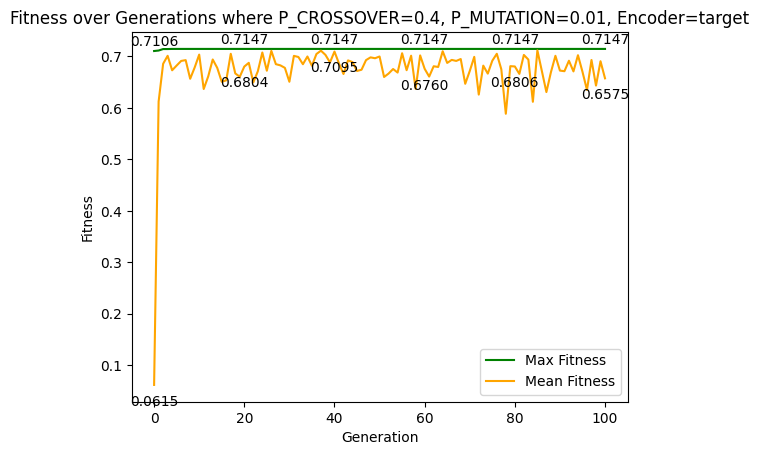

,gen,avg,std,min,max
0,0,0.061502,0.708321,-1.000000,0.710577
1,1,0.612263,0.196011,-1.000000,0.711538
2,2,0.685750,0.040768,0.335337,0.714423
3,3,0.701281,0.037686,0.357692,0.714423
4,4,0.673133,0.186280,-1.000000,0.714663
5,5,0.682361,0.180524,-1.000000,0.714663
6,6,0.691303,0.078732,0.346875,0.714663
7,7,0.692874,0.073494,0.335337,0.714663
8,8,0.656653,0.249681,-1.000000,0.714663
9,9,0.678690,0.184398,-1.000000,0.714663


-------------- GUESS 2 --------------


Currently on run 1 of 20
The execution time is 77.27796816825867 seconds.
-- Best Individual =  for_loop(logical_or(ARG2, pow2(sub(logical_and(logical_and(ARG0, ARG9), if_then_else(ARG7, ARG8, ARG3)), sub(ARG3, ARG8)))), ARG8, neg(sub(logical_and(logical_and(ARG0, ARG9), if_then_else(ARG7, ARG8, ARG3)), sub(ARG3, ARG8))))
Maximum fitness achieved:  0.7328301886792453
Validation Accuracy:       0.7596153846153846
CSV file saved to: F:/Nextcloud/University/Sem1/CS6271 EVOLUTIONARY COMPUTATION AND HUMANOID ROBOTICS/kaggle_submissions/kaggle_submission__f=0.7328301886792453_v=0.7596153846153846.csv


Currently on run 2 of 20
The execution time is 76.98958373069763 seconds.
-- Best Individual =  for_loop(logical_or(ARG2, pow2(sub(logical_and(logical_and(ARG0, ARG9), if_then_else(ARG7, ARG8, ARG3)), sub(ARG3, ARG8)))), ARG8, neg(sub(logical_and(logical_and(ARG0, ARG9), if_then_else(ARG7, ARG8, ARG3)), sub(ARG3, ARG8))))
Maximum fitness achieved:  0.732

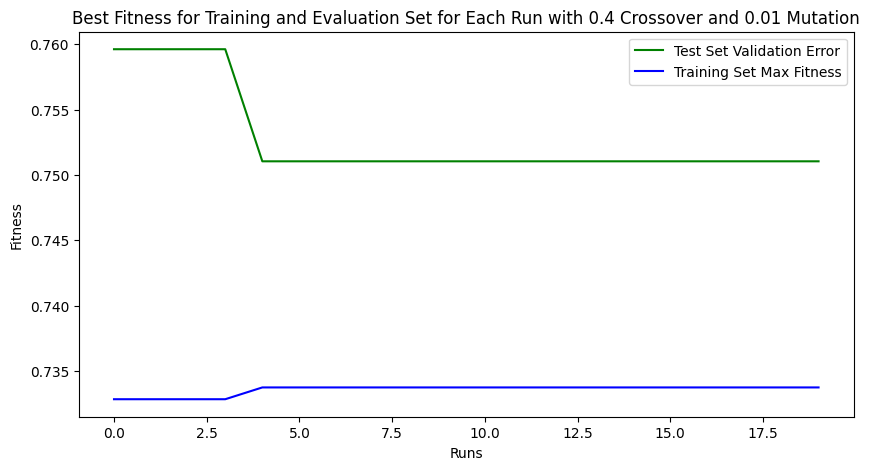


------------------------------------
Best Individual: for_loop(logical_or(ARG2, pow2(psin(ARG2))), ARG8, neg(sub(logical_and(logical_and(ARG9, ARG9), if_then_else(logical_and(logical_and(ARG0, ARG9), logical_and(ARG0, ARG8)), ARG8, logical_and(logical_and(ARG0, ARG7), if_then_else(sub(mul(ARG7, ARG3), ARG8), ARG8, ARG9)))), sub(mul(ARG7, ARG2), ARG8))))
Fitness: 0.7337322363500374
------------------------------------

------------------------------------------------------------------


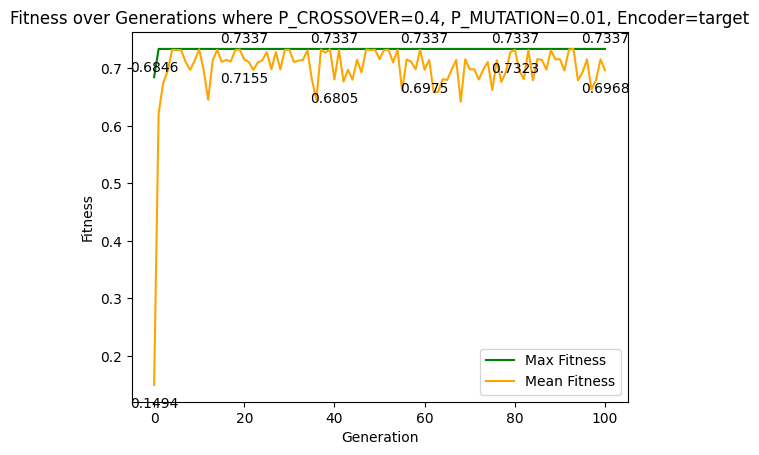

,gen,avg,std,min,max
0,0,0.149412,0.676827,-1.000000,0.684615
1,1,0.621352,0.193975,-1.000000,0.733732
2,2,0.674342,0.178881,-1.000000,0.733732
3,3,0.695134,0.242480,-1.000000,0.733732
4,4,0.732175,0.005585,0.711779,0.733732
5,5,0.731849,0.007303,0.684867,0.733732
6,6,0.731579,0.007860,0.679382,0.733732
7,7,0.710805,0.176480,-1.000000,0.733732
8,8,0.697187,0.242539,-1.000000,0.733732
9,9,0.713595,0.172441,-1.000000,0.733732


-------------- GUESS 3 --------------


Currently on run 1 of 20
The execution time is 72.5590124130249 seconds.
-- Best Individual =  add(pow2(neg(sub(add(ARG4, ARG8), psin(sub(add(ARG4, ARG8), psin(ARG2)))))), logical_or(logical_or(ARG1, ARG1), ARG4))
Maximum fitness achieved:  0.7685096153846154
Validation Accuracy:       0.7778846153846154
CSV file saved to: F:/Nextcloud/University/Sem1/CS6271 EVOLUTIONARY COMPUTATION AND HUMANOID ROBOTICS/kaggle_submissions/kaggle_submission__f=0.7685096153846154_v=0.7778846153846154.csv


Currently on run 2 of 20
The execution time is 105.73509335517883 seconds.
-- Best Individual =  add(pow2(neg(sub(add(ARG4, ARG8), psin(sub(add(ARG4, ARG8), psin(ARG2)))))), logical_or(logical_or(ARG1, ARG1), ARG4))
Maximum fitness achieved:  0.7685096153846154
Validation Accuracy:       0.7778846153846154
CSV file saved to: F:/Nextcloud/University/Sem1/CS6271 EVOLUTIONARY COMPUTATION AND HUMANOID ROBOTICS/kaggle_submissions/kaggle_submission__f=0.76850961538461

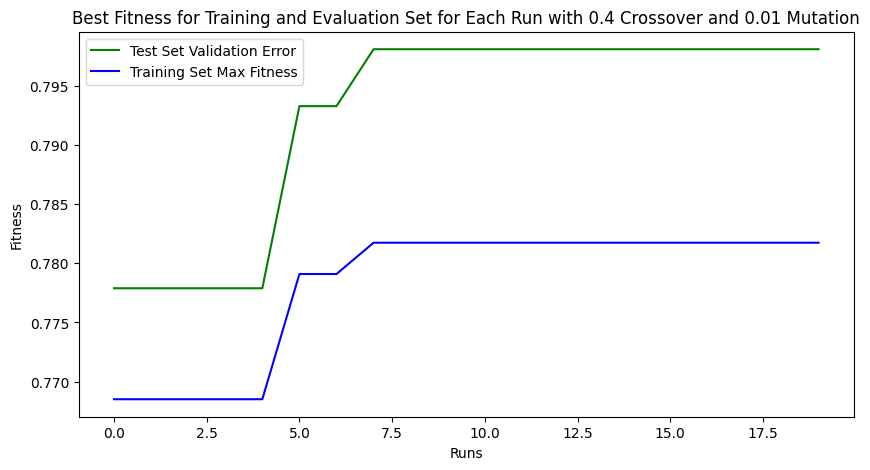


------------------------------------
Best Individual: add(neg(neg(neg(neg(sub(ARG8, psin(psin(sub(add(ARG7, ARG8), ARG3)))))))), logical_or(ARG1, logical_or(neg(sub(psin(sub(add(ARG7, ARG8), ARG3)), psin(ARG7))), ARG2)))
Fitness: 0.7817307692307692
------------------------------------

------------------------------------------------------------------


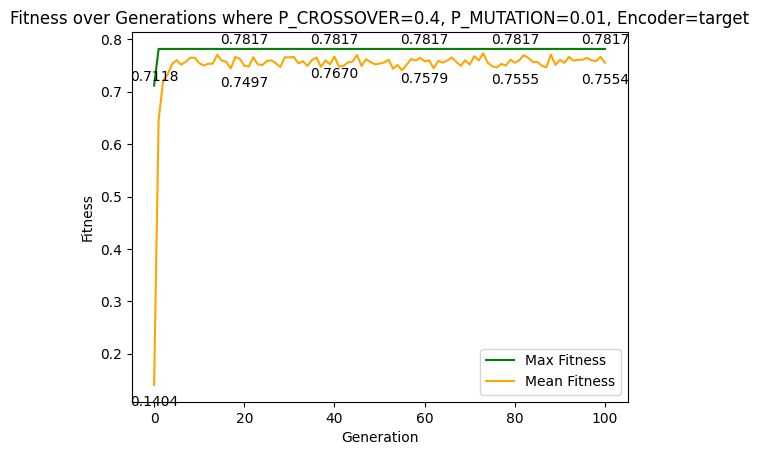

,gen,avg,std,min,max
0,0,0.140430,0.655194,-1.000000,0.711779
1,1,0.645695,0.104872,0.335337,0.781731
2,2,0.720310,0.068397,0.344231,0.781731
3,3,0.733264,0.185600,-1.000000,0.781731
4,4,0.752846,0.062890,0.335337,0.781731
5,5,0.760332,0.061357,0.306971,0.781731
6,6,0.751493,0.054809,0.527885,0.781731
7,7,0.757147,0.063558,0.440865,0.781731
8,8,0.764940,0.059281,0.335337,0.781731
9,9,0.764820,0.042228,0.565144,0.781731


-----------------RANDOM_SEED: 42------------------------
-----------------ENCODING METHOD: target-----------------
-----------------TRAIN_TEST_SPLIT: 0.2---------------
--------------------------------------------------------

Running GP with P_CROSSOVER: 0.4 and P_MUTATION: 0.1

 Max Generations: 100 

 Population Size: 100 

-------------- GUESS 1 --------------


Currently on run 1 of 20
The execution time is 142.80594754219055 seconds.
-- Best Individual =  add(lt(pexp(logical_and(ARG1, if_then_else(if_then_else(for_loop(ARG0, ARG2, ARG3), lt(ARG8, ARG0), lt(ARG8, ARG3)), neg(add(ARG2, ARG3)), lt(if_then_else(ARG8, 0.7186659553754219, lt(ARG8, ARG3)), add(ARG2, ARG2))))), ARG1), if_then_else(for_loop(ARG8, ARG0, ARG3), mul(mul(ARG8, 0.7186659553754219), 0.7186659553754219), 0.7186659553754219))
Maximum fitness achieved:  0.7824519230769231
Validation Accuracy:       0.7990384615384616
CSV file saved to: F:/Nextcloud/University/Sem1/CS6271 EVOLUTIONARY COMPUTATION AND HUMANOID ROBOT

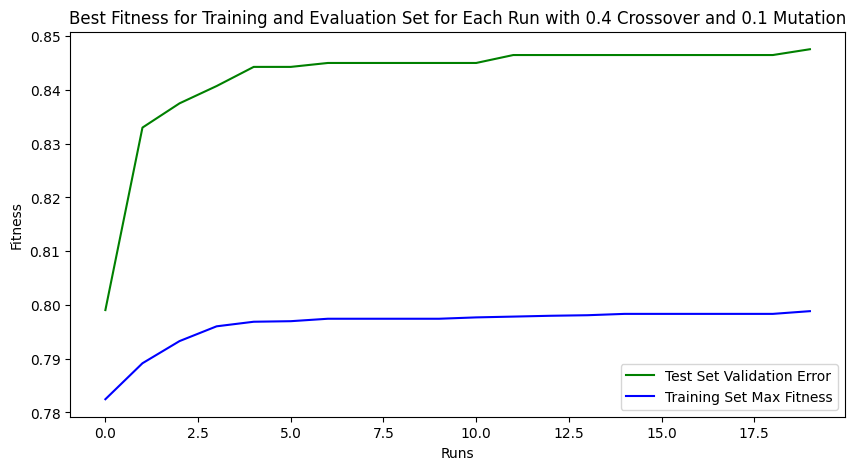


------------------------------------
Best Individual: add(lt(pexp(logical_and(lt(ARG8, ARG3), if_then_else(if_then_else(lt(ARG1, ARG3), lt(ARG8, logical_and(psin(ARG1), pcos(ARG6))), lt(ARG0, if_then_else(for_loop(for_loop(if_then_else(lt(ARG0, pcos(ARG9)), psin(add(neg(psin(ARG5)), mul(ARG6, ARG0))), ARG3), ARG4, if_then_else(logical_and(neg(0.3204079821948198), psin(ARG5)), ARG3, neg(ARG7))), sub(ARG0, ARG8), ARG3), ARG3, ARG8))), neg(add(ARG2, ARG3)), psin(psin(add(neg(ARG4), mul(psin(add(neg(psin(ARG5)), mul(ARG6, ARG0))), ARG3))))))), ARG1), if_then_else(for_loop(lt(logical_and(ARG1, if_then_else(if_then_else(sub(ARG0, ARG8), lt(ARG8, ARG0), lt(ARG8, for_loop(logical_not(logical_and(ARG8, 0.9539233054923949)), neg(neg(ARG3)), lt(pcos(psin(add(neg(ARG7), mul(ARG8, neg(ARG0))))), if_then_else(ARG0, psin(add(neg(ARG9), mul(ARG8, ARG3))), lt(ARG1, ARG5)))))), neg(add(ARG2, for_loop(ARG0, neg(ARG3), for_loop(ARG6, ARG1, ARG5)))), lt(mul(ARG1, 0.7186659553754219), ARG2))), pow2(if_then

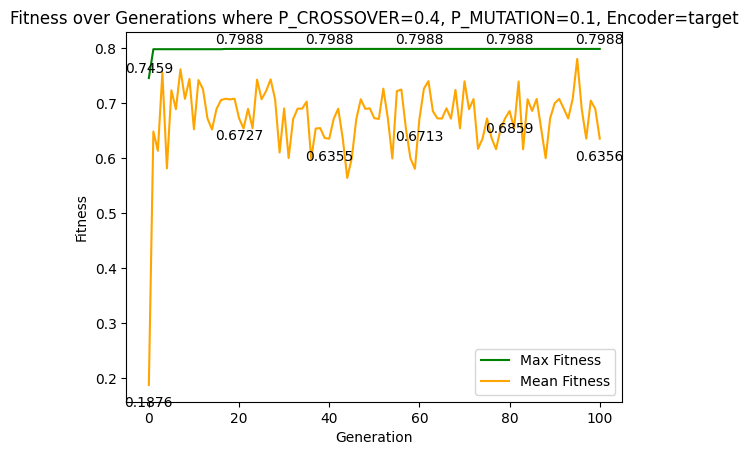

,gen,avg,std,min,max
0,0,0.187622,0.645965,-1.000000,0.745913
1,1,0.648509,0.115220,0.335337,0.798330
2,2,0.613639,0.448242,-1.000000,0.798330
3,3,0.755543,0.251932,-1.000000,0.798330
4,4,0.581516,0.584036,-1.000000,0.798330
5,5,0.723504,0.352064,-1.000000,0.798330
6,6,0.689258,0.426917,-1.000000,0.798330
7,7,0.761732,0.251688,-1.000000,0.798330
8,8,0.707955,0.391835,-1.000000,0.798330
9,9,0.744201,0.306741,-1.000000,0.798330


-------------- GUESS 2 --------------


Currently on run 1 of 20
The execution time is 217.77748203277588 seconds.
-- Best Individual =  lt(lt(ARG1, mul(add(ARG8, sub(psin(0.6269646488263211), gt(logical_not(ARG2), add(add(ARG8, ARG2), psin(0.6269646488263211))))), psin(add(psin(0.6269646488263211), sub(psin(lt(ARG1, mul(lt(ARG8, sub(psin(0.6269646488263211), gt(logical_not(ARG1), add(ARG1, ARG2)))), psin(add(ARG8, sub(psin(0.6269646488263211), gt(ARG8, add(add(ARG8, ARG2), ARG2)))))))), gt(logical_not(ARG1), add(add(ARG8, logical_not(ARG1)), ARG2))))))), add(ARG8, ARG2))
Maximum fitness achieved:  0.7848557692307693
Validation Accuracy:       0.7923076923076923
CSV file saved to: F:/Nextcloud/University/Sem1/CS6271 EVOLUTIONARY COMPUTATION AND HUMANOID ROBOTICS/kaggle_submissions/kaggle_submission__f=0.7848557692307693_v=0.7923076923076923.csv


Currently on run 2 of 20
The execution time is 275.9601638317108 seconds.
-- Best Individual =  lt(lt(ARG1, mul(add(ARG8, sub(psin(0.62696464

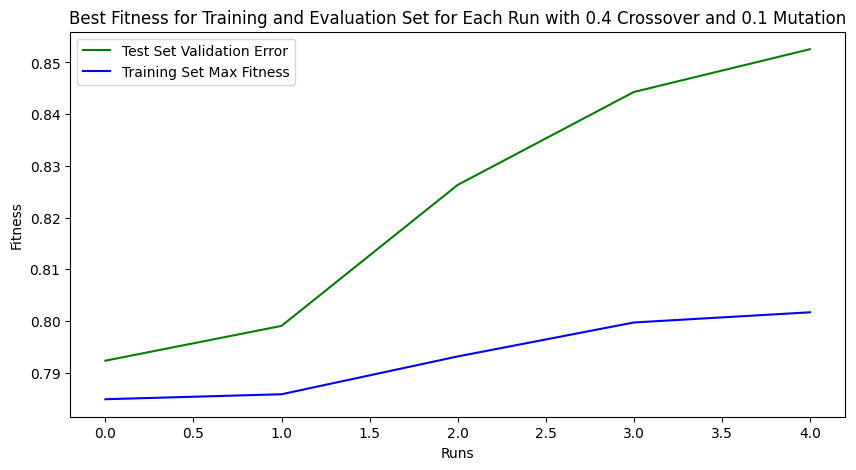


------------------------------------
Best Individual: lt(lt(ARG1, mul(0.685175221795631, add(mul(add(ARG8, sub(psin(0.6269646488263211), add(for_loop(logical_or(ARG4, ARG6), ARG7, neg(sub(ARG8, mul(mul(mul(ARG1, ARG9), neg(sub(add(for_loop(ARG1, ARG3, ARG3), neg(0.574175486624329)), mul(ARG1, ARG9)))), neg(sub(add(for_loop(neg(0.574175486624329), ARG3, ARG3), neg(0.574175486624329)), mul(ARG1, ARG9))))))), neg(psin(0.6269646488263211))))), add(psin(sub(add(ARG8, add(ARG8, sub(psin(0.6269646488263211), add(for_loop(ARG6, ARG4, mul(ARG9, sub(psin(ARG7), for_loop(ARG2, ARG8, 0.40601641570672653)))), neg(0.574175486624329))))), psin(lt(ARG1, ARG4)))), sub(psin(lt(ARG3, ARG4)), logical_and(logical_and(for_loop(0.574175486624329, ARG4, mul(ARG6, neg(sub(ARG8, ARG3)))), ARG8), mul(ARG1, ARG6))))), sub(psin(lt(ARG1, ARG4)), gt(ARG2, add(add(ARG8, add(ARG8, sub(psin(0.6269646488263211), add(for_loop(ARG1, ARG4, ARG3), neg(0.574175486624329))))), ARG2)))))), add(ARG8, ARG2))
Fitness: 0.80166961

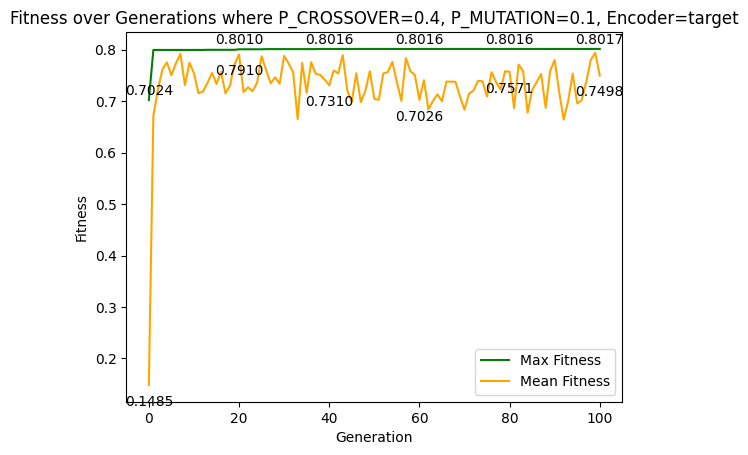

,gen,avg,std,min,max
0,0,0.148475,0.676227,-1.000000,0.702404
1,1,0.671506,0.075940,0.334856,0.799699
2,2,0.722384,0.095848,0.331306,0.799699
3,3,0.761742,0.182739,-1.000000,0.799699
4,4,0.775356,0.180411,-1.000000,0.799699
5,5,0.750378,0.252868,-1.000000,0.799699
6,6,0.773820,0.180645,-1.000000,0.799699
7,7,0.792157,0.027065,0.646369,0.799699
8,8,0.731290,0.308321,-1.000000,0.799699
9,9,0.774872,0.179803,-1.000000,0.799699


-------------- GUESS 3 --------------


Currently on run 1 of 20
The execution time is 256.1129424571991 seconds.
-- Best Individual =  if_then_else(psin(pow2(mul(lt(ARG0, ARG2), pcos(ARG0)))), add(mul(lt(psin(ARG8), pow2(if_then_else(if_then_else(ARG4, pcos(ARG2), ARG8), ARG8, ARG4))), ARG1), add(mul(lt(psin(ARG8), pow2(if_then_else(lt(ARG0, ARG2), ARG8, ARG8))), ARG1), psin(psin(ARG8)))), pow2(mul(lt(if_then_else(ARG4, pcos(mul(lt(ARG0, ARG2), pcos(ARG0))), ARG8), ARG8), ARG8)))
Maximum fitness achieved:  0.7774038461538462
Validation Accuracy:       0.7903846153846154
CSV file saved to: F:/Nextcloud/University/Sem1/CS6271 EVOLUTIONARY COMPUTATION AND HUMANOID ROBOTICS/kaggle_submissions/kaggle_submission__f=0.7774038461538462_v=0.7903846153846154.csv


Currently on run 2 of 20
The execution time is 436.2713899612427 seconds.
-- Best Individual =  if_then_else(psin(pow2(mul(lt(ARG0, ARG2), pcos(ARG0)))), add(mul(lt(psin(mul(psin(mul(lt(psin(ARG8), pow2(if_then_else(lt(psin(ARG8), ARG

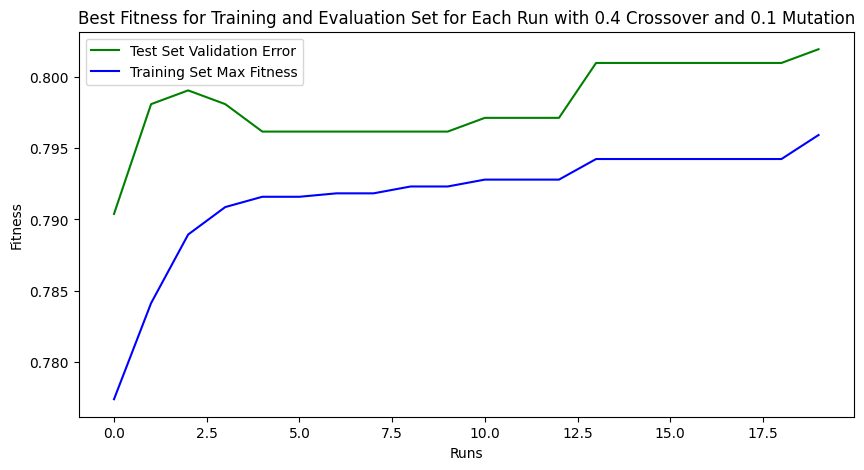


------------------------------------
Best Individual: if_then_else(psin(pow2(pow2(mul(lt(ARG0, mul(lt(ARG0, ARG3), psin(add(mul(lt(psin(ARG8), pow2(ARG1)), lt(psin(gt(neg(ARG6), pexp(pcos(ARG1)))), mul(lt(ARG8, ARG0), pow2(ARG8)))), psin(psin(psin(psin(psin(mul(lt(ARG0, ARG8), pcos(ARG9))))))))))), psin(add(ARG1, psin(psin(psin(psin(psin(mul(ARG8, pcos(psin(ARG8)))))))))))))), add(mul(lt(psin(pexp(ARG8)), lt(psin(gt(neg(ARG6), pexp(pcos(ARG9)))), mul(gt(ARG7, ARG8), pow2(ARG8)))), add(ARG1, psin(pow2(ARG1)))), add(mul(lt(psin(ARG8), pow2(if_then_else(lt(psin(ARG8), ARG2), ARG8, pow2(mul(lt(neg(ARG6), ARG8), pcos(psin(ARG8))))))), ARG1), psin(mul(ARG8, pcos(psin(ARG8)))))), pow2(mul(psin(psin(psin(psin(lt(psin(mul(ARG8, ARG9)), ARG9))))), ARG8)))
Fitness: 0.7959134615384615
------------------------------------

------------------------------------------------------------------


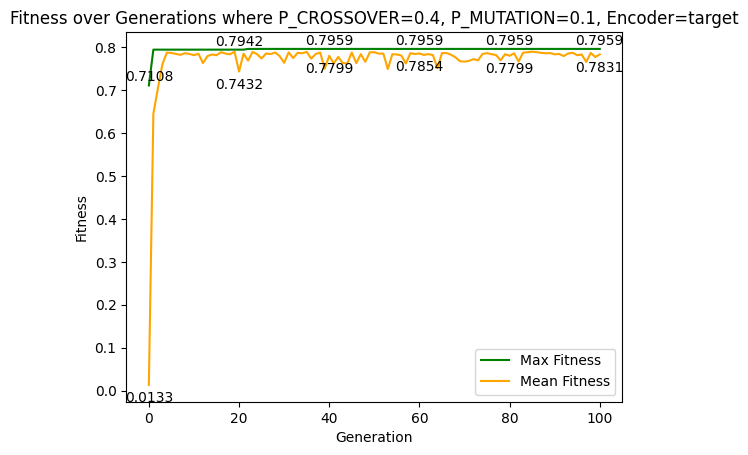

,gen,avg,std,min,max
0,0,0.013334,0.722724,-1.000000,0.710817
1,1,0.644881,0.106408,0.335337,0.794231
2,2,0.703822,0.189107,-1.000000,0.794231
3,3,0.760161,0.181465,-1.000000,0.794231
4,4,0.787394,0.020188,0.708654,0.794231
5,5,0.786493,0.032925,0.498077,0.794231
6,6,0.784216,0.023463,0.688221,0.794231
7,7,0.782147,0.029454,0.631490,0.794231
8,8,0.786041,0.021610,0.685577,0.794231
9,9,0.784123,0.027289,0.688702,0.794231


-----------------RANDOM_SEED: 42------------------------
-----------------ENCODING METHOD: target-----------------
-----------------TRAIN_TEST_SPLIT: 0.2---------------
--------------------------------------------------------

Running GP with P_CROSSOVER: 0.4 and P_MUTATION: 0.3

 Max Generations: 100 

 Population Size: 100 

-------------- GUESS 1 --------------


Currently on run 1 of 20
The execution time is 125.02977395057678 seconds.
-- Best Individual =  if_then_else(pow2(if_then_else(logical_or(ARG3, ARG6), lt(ARG3, lt(ARG1, lt(0.2018671216711918, pow2(if_then_else(lt(ARG3, 0.4032259453058752), lt(mul(ARG0, ARG8), lt(lt(ARG3, lt(ARG1, 0.4032259453058752)), ARG9)), ARG8))))), ARG5)), ARG8, sub(ARG1, mul(ARG8, sub(ARG0, ARG8))))
Maximum fitness achieved:  0.7872596153846154
Validation Accuracy:       0.7971153846153847
CSV file saved to: F:/Nextcloud/University/Sem1/CS6271 EVOLUTIONARY COMPUTATION AND HUMANOID ROBOTICS/kaggle_submissions/kaggle_submission__f=0.7872596153846154_v=

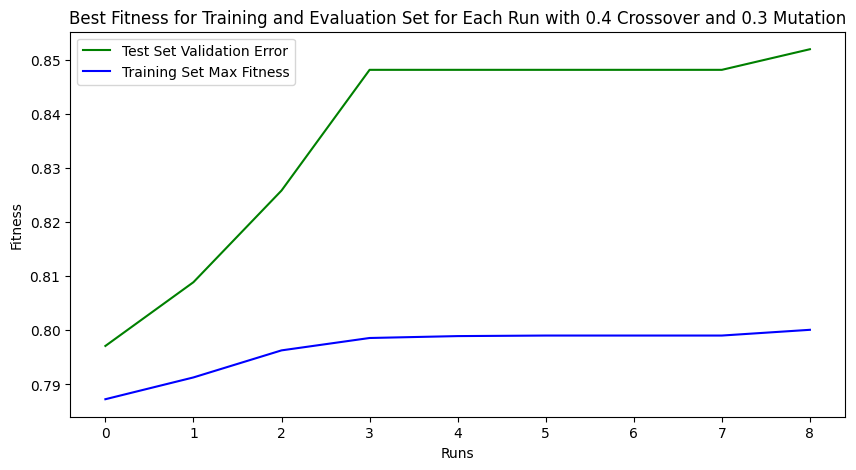


------------------------------------
Best Individual: if_then_else(pow2(if_then_else(ARG1, lt(logical_not(for_loop(if_then_else(psin(neg(mul(ARG9, ARG3))), psin(ARG3), lt(ARG2, pow2(if_then_else(lt(ARG3, 0.4032259453058752), if_then_else(lt(ARG3, 0.4032259453058752), if_then_else(lt(ARG8, 0.4032259453058752), lt(mul(ARG0, ARG8), lt(ARG7, pcos(if_then_else(ARG5, ARG5, ARG6)))), ARG8), ARG8), ARG8)))), mul(ARG8, ARG5), logical_and(pcos(ARG4), protectedDiv(lt(lt(add(for_loop(ARG7, ARG6, add(sub(pow2(ARG1), logical_and(ARG3, ARG3)), pcos(ARG9))), ARG1), lt(ARG1, ARG5)), pcos(ARG9)), ARG8)))), lt(sub(ARG0, mul(neg(ARG3), sub(sub(ARG2, mul(neg(ARG1), sub(ARG6, ARG8))), ARG8))), lt(ARG0, pow2(lt(0.2018671216711918, pow2(if_then_else(lt(ARG3, 0.4032259453058752), if_then_else(lt(ARG3, 0.4032259453058752), lt(mul(sub(ARG7, ARG2), ARG8), lt(lt(add(ARG3, ARG4), lt(ARG1, ARG4)), ARG9)), ARG8), ARG8))))))), if_then_else(ARG3, sub(logical_or(ARG6, ARG1), mul(neg(ARG1), mul(pcos(ARG7), for_loop(ARG5

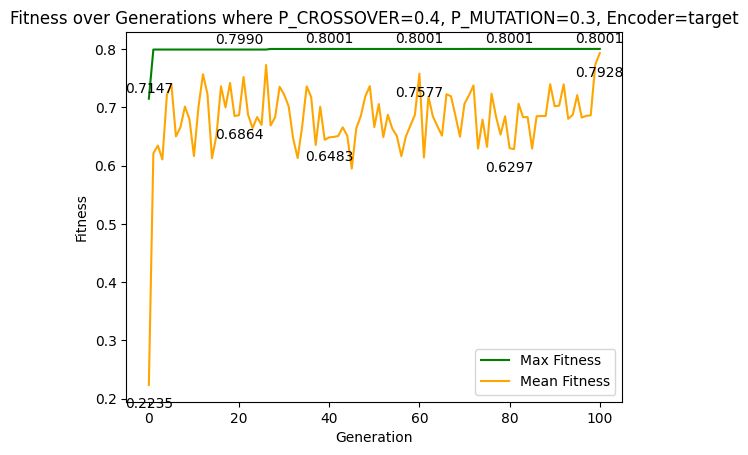

,gen,avg,std,min,max
0,0,0.223510,0.609581,-1.000000,0.714663
1,1,0.620979,0.294439,-1.000000,0.799039
2,2,0.634300,0.384742,-1.000000,0.799039
3,3,0.610450,0.513371,-1.000000,0.799039
4,4,0.721437,0.352177,-1.000000,0.799039
5,5,0.739539,0.306620,-1.000000,0.799039
6,6,0.649986,0.487046,-1.000000,0.799039
7,7,0.665605,0.457556,-1.000000,0.799039
8,8,0.701142,0.391353,-1.000000,0.799039
9,9,0.679465,0.426396,-1.000000,0.799039


-------------- GUESS 2 --------------


Currently on run 1 of 20
The execution time is 121.42525339126587 seconds.
-- Best Individual =  for_loop(logical_and(add(if_then_else(ARG1, ARG2, ARG4), logical_and(ARG2, ARG4)), logical_or(if_then_else(pow2(psin(for_loop(ARG8, ARG0, ARG3))), ARG0, pow2(ARG8)), sub(ARG2, ARG4))), add(add(ARG2, pow2(pow2(ARG8))), pow2(pow2(ARG1))), gt(ARG8, add(logical_and(add(if_then_else(ARG1, ARG2, pow2(ARG8)), logical_and(ARG2, ARG4)), logical_or(if_then_else(ARG9, ARG0, ARG0), sub(ARG2, ARG4))), pow2(pow2(pow2(ARG8))))))
Maximum fitness achieved:  0.7884231536926147
Validation Accuracy:       0.8261316872427984
CSV file saved to: F:/Nextcloud/University/Sem1/CS6271 EVOLUTIONARY COMPUTATION AND HUMANOID ROBOTICS/kaggle_submissions/kaggle_submission__f=0.7884231536926147_v=0.8261316872427984.csv

Delta between Training and Validation is too high. Exiting loop.

------------------------------------
Best Individual: for_loop(logical_and(add(if_then_else(ARG1, AR

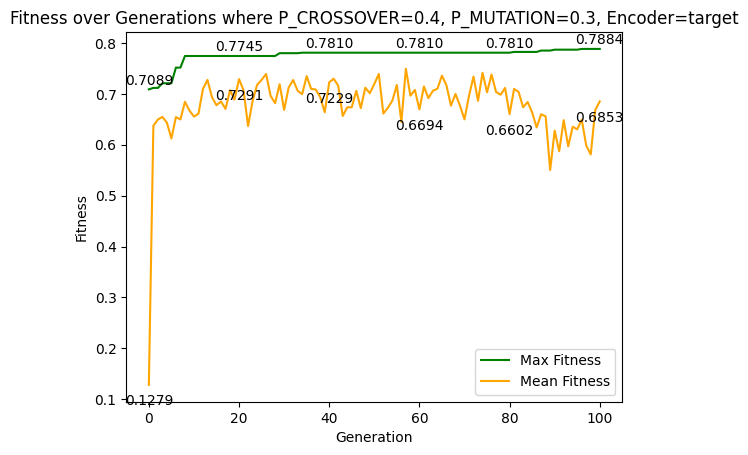

,gen,avg,std,min,max
0,0,0.127923,0.665651,-1.000000,0.708894
1,1,0.637285,0.092797,0.327885,0.711779
2,2,0.649668,0.185603,-1.000000,0.711779
3,3,0.654725,0.245269,-1.000000,0.720913
4,4,0.643437,0.293781,-1.000000,0.720913
5,5,0.612423,0.374033,-1.000000,0.720913
6,6,0.654412,0.293923,-1.000000,0.751683
7,7,0.649846,0.258340,-1.000000,0.751683
8,8,0.684514,0.187481,-1.000000,0.774519
9,9,0.667344,0.256763,-1.000000,0.774519


-------------- GUESS 3 --------------


Currently on run 1 of 20
The execution time is 124.4508147239685 seconds.
-- Best Individual =  pow2(pcos(protectedDiv(psin(logical_and(logical_and(0.9947065157213971, ARG1), ARG7)), ARG8)))
Maximum fitness achieved:  0.7257211538461539
Validation Accuracy:       0.7163461538461539
CSV file saved to: F:/Nextcloud/University/Sem1/CS6271 EVOLUTIONARY COMPUTATION AND HUMANOID ROBOTICS/kaggle_submissions/kaggle_submission__f=0.7257211538461539_v=0.7163461538461539.csv

Runs did not achieve validation of 0.75. Exiting loop.

------------------------------------
Best Individual: pow2(pcos(protectedDiv(psin(logical_and(logical_and(0.9947065157213971, ARG1), ARG7)), ARG8)))
Fitness: 0.7257211538461539
------------------------------------

------------------------------------------------------------------


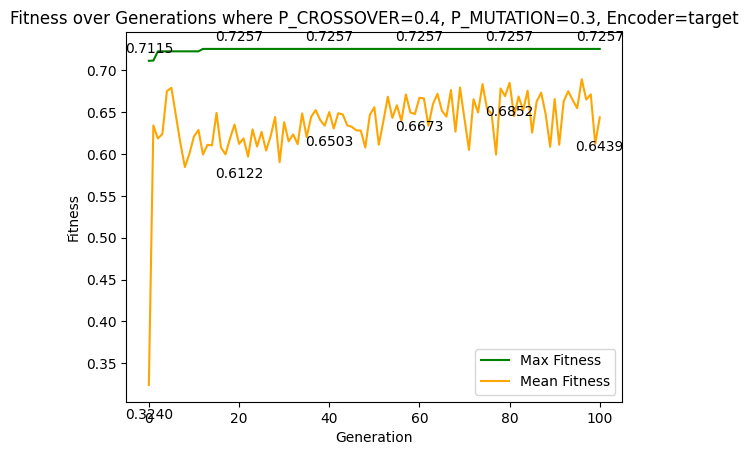

,gen,avg,std,min,max
0,0,0.324041,0.573325,-1.000000,0.711538
1,1,0.634279,0.183781,-1.000000,0.711779
2,2,0.618614,0.296397,-1.000000,0.722837
3,3,0.624089,0.299464,-1.000000,0.722837
4,4,0.675219,0.099809,0.290625,0.722837
5,5,0.679207,0.090232,0.292788,0.722837
6,6,0.645940,0.133021,0.292788,0.722837
7,7,0.612762,0.265792,-1.000000,0.722837
8,8,0.584500,0.316686,-1.000000,0.722837
9,9,0.600549,0.229338,-1.000000,0.722837


-----------------RANDOM_SEED: 42------------------------
-----------------ENCODING METHOD: target-----------------
-----------------TRAIN_TEST_SPLIT: 0.2---------------
--------------------------------------------------------

Running GP with P_CROSSOVER: 0.6 and P_MUTATION: 0.01

 Max Generations: 100 

 Population Size: 100 

-------------- GUESS 1 --------------


Currently on run 1 of 20
The execution time is 99.10713863372803 seconds.
-- Best Individual =  if_then_else(ARG7, protectedDiv(protectedDiv(ARG8, ARG5), protectedDiv(protectedDiv(ARG5, ARG3), ARG8)), logical_not(protectedDiv(ARG5, ARG5)))
Maximum fitness achieved:  0.7290865384615385
Validation Accuracy:       0.7173076923076923
CSV file saved to: F:/Nextcloud/University/Sem1/CS6271 EVOLUTIONARY COMPUTATION AND HUMANOID ROBOTICS/kaggle_submissions/kaggle_submission__f=0.7290865384615385_v=0.7173076923076923.csv

Runs did not achieve validation of 0.75. Exiting loop.

------------------------------------
Best Individual: i

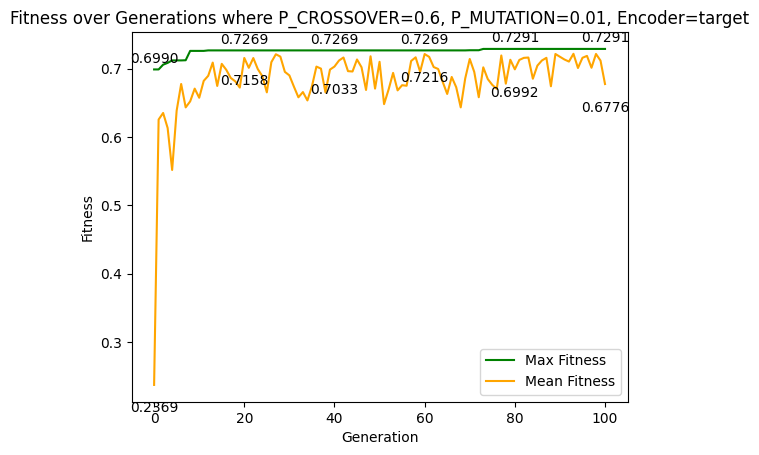

,gen,avg,std,min,max
0,0,0.236903,0.614613,-1.000000,0.699038
1,1,0.625661,0.182378,-1.000000,0.699038
2,2,0.635276,0.186436,-1.000000,0.706010
3,3,0.613291,0.332747,-1.000000,0.708654
4,4,0.551784,0.460451,-1.000000,0.712260
5,5,0.638695,0.293867,-1.000000,0.712260
6,6,0.677757,0.175875,-1.000000,0.712260
7,7,0.643435,0.294040,-1.000000,0.712500
8,8,0.652274,0.199259,-1.000000,0.726202
9,9,0.670940,0.183582,-1.000000,0.726202


-------------- GUESS 2 --------------


Currently on run 1 of 20
The execution time is 148.49075365066528 seconds.
-- Best Individual =  mul(pexp(logical_and(pexp(logical_and(pexp(pexp(for_loop(ARG0, ARG2, ARG8))), ARG5)), for_loop(for_loop(ARG0, ARG2, ARG8), ARG3, ARG3))), psin(psin(ARG1)))
Maximum fitness achieved:  0.7553723138430785
Validation Accuracy:       0.7971014492753623
CSV file saved to: F:/Nextcloud/University/Sem1/CS6271 EVOLUTIONARY COMPUTATION AND HUMANOID ROBOTICS/kaggle_submissions/kaggle_submission__f=0.7553723138430785_v=0.7971014492753623.csv

Delta between Training and Validation is too high. Exiting loop.

------------------------------------
Best Individual: mul(pexp(logical_and(pexp(logical_and(pexp(pexp(for_loop(ARG0, ARG2, ARG8))), ARG5)), for_loop(for_loop(ARG0, ARG2, ARG8), ARG3, ARG3))), psin(psin(ARG1)))
Fitness: 0.7553723138430785
------------------------------------

------------------------------------------------------------------


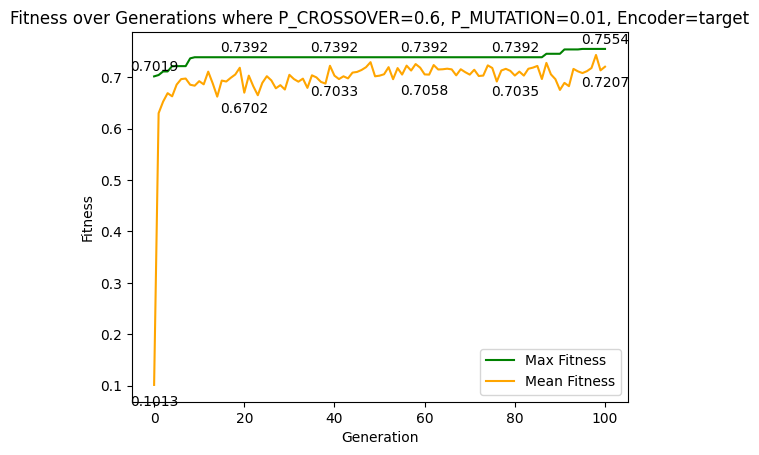

,gen,avg,std,min,max
0,0,0.101306,0.698830,-1.000000,0.701923
1,1,0.630265,0.100273,0.311538,0.704567
2,2,0.652855,0.088733,0.310337,0.711538
3,3,0.669258,0.086938,0.310337,0.711538
4,4,0.663099,0.117239,0.292308,0.721875
5,5,0.685918,0.086961,0.287500,0.721875
6,6,0.696623,0.057337,0.288221,0.721875
7,7,0.697716,0.055161,0.335337,0.721875
8,8,0.685654,0.087212,0.326202,0.737019
9,9,0.683785,0.092714,0.323798,0.739183


-------------- GUESS 3 --------------


Currently on run 1 of 20
The execution time is 80.88093423843384 seconds.
-- Best Individual =  pow2(sub(sub(sub(ARG8, mul(ARG1, mul(ARG3, 0.790509568695562))), mul(mul(ARG3, mul(ARG3, 0.790509568695562)), mul(ARG3, mul(ARG1, mul(ARG3, 0.790509568695562))))), ARG1))
Maximum fitness achieved:  0.7487980769230769
Validation Accuracy:       0.7653846153846153
CSV file saved to: F:/Nextcloud/University/Sem1/CS6271 EVOLUTIONARY COMPUTATION AND HUMANOID ROBOTICS/kaggle_submissions/kaggle_submission__f=0.7487980769230769_v=0.7653846153846153.csv


Currently on run 2 of 20
The execution time is 112.25846552848816 seconds.
-- Best Individual =  pow2(sub(sub(sub(ARG8, mul(ARG1, ARG3)), mul(mul(mul(ARG3, 0.790509568695562), sub(mul(mul(ARG3, 0.790509568695562), sub(sub(mul(0.790509568695562, sub(mul(ARG3, 0.790509568695562), ARG3)), mul(ARG3, ARG3)), ARG3)), mul(ARG3, ARG3))), ARG3)), ARG3))
Maximum fitness achieved:  0.7610576923076923
Validation Accuracy:

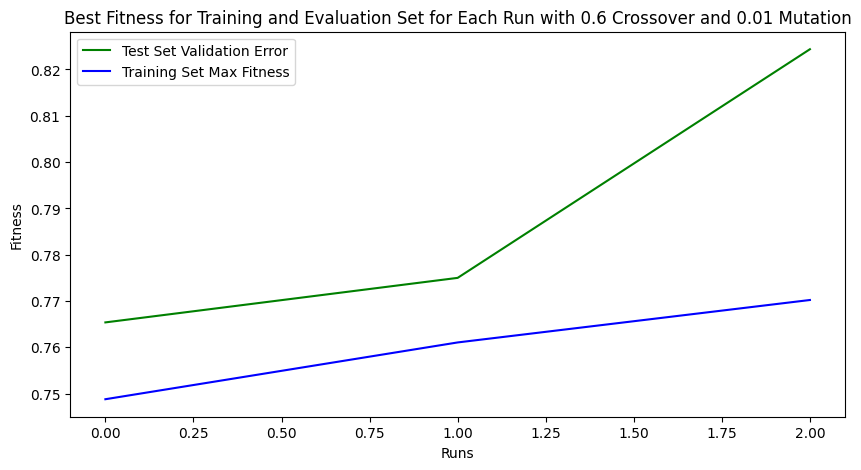


------------------------------------
Best Individual: pow2(sub(sub(sub(ARG8, mul(ARG1, ARG3)), mul(mul(mul(ARG3, 0.790509568695562), sub(mul(mul(ARG3, 0.790509568695562), sub(mul(mul(mul(0.790509568695562, 0.790509568695562), sub(mul(0.790509568695562, sub(sub(mul(0.790509568695562, sub(sub(ARG6, ARG0), 0.790509568695562)), ARG0), 0.790509568695562)), mul(for_loop(sub(sub(ARG3, ARG3), 0.790509568695562), 0.5394293473253595, ARG5), ARG0))), mul(ARG3, add(for_loop(sub(sub(mul(0.790509568695562, sub(sub(ARG6, ARG0), 0.790509568695562)), ARG0), 0.790509568695562), add(for_loop(ARG3, ARG2, ARG8), ARG2), logical_and(protectedDiv(0.790509568695562, ARG0), sub(mul(0.790509568695562, sub(sub(ARG6, ARG0), 0.790509568695562)), ARG0))), logical_not(sub(sub(ARG3, ARG0), 0.790509568695562))))), ARG3)), mul(ARG3, ARG3))), ARG3)), ARG3))
Fitness: 0.7702224469160769
------------------------------------

------------------------------------------------------------------


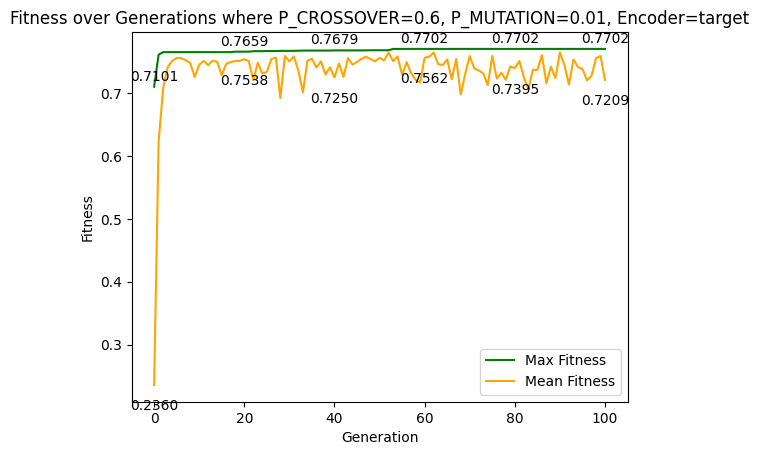

,gen,avg,std,min,max
0,0,0.236019,0.577685,-1.000000,0.710096
1,1,0.622434,0.247837,-1.000000,0.761058
2,2,0.707242,0.073258,0.335337,0.765117
3,3,0.741159,0.041407,0.624038,0.765117
4,4,0.751015,0.032404,0.628365,0.765117
5,5,0.755865,0.024409,0.628365,0.765117
6,6,0.755676,0.031440,0.624038,0.765117
7,7,0.752315,0.036384,0.610945,0.765117
8,8,0.747839,0.067413,0.310845,0.765117
9,9,0.725649,0.182089,-1.000000,0.765117


-----------------RANDOM_SEED: 42------------------------
-----------------ENCODING METHOD: target-----------------
-----------------TRAIN_TEST_SPLIT: 0.2---------------
--------------------------------------------------------

Running GP with P_CROSSOVER: 0.6 and P_MUTATION: 0.1

 Max Generations: 100 

 Population Size: 100 

-------------- GUESS 1 --------------


Currently on run 1 of 20
The execution time is 183.85464882850647 seconds.
-- Best Individual =  if_then_else(add(ARG9, logical_not(psin(logical_not(sub(add(ARG2, psin(ARG8)), add(ARG0, psin(ARG8))))))), if_then_else(lt(add(ARG8, sub(psin(add(ARG0, psin(ARG8))), add(neg(add(ARG8, sub(psin(if_then_else(lt(ARG8, psin(ARG0)), ARG0, neg(ARG6))), add(ARG2, psin(logical_not(sub(ARG9, add(ARG0, psin(ARG8))))))))), psin(ARG8)))), neg(add(ARG8, sub(psin(if_then_else(lt(ARG8, add(ARG2, psin(ARG8))), ARG0, ARG0)), add(ARG2, psin(ARG8)))))), ARG1, ARG8), logical_not(sub(ARG9, add(ARG0, psin(ARG8)))))
Maximum fitness achieved:  0.746394

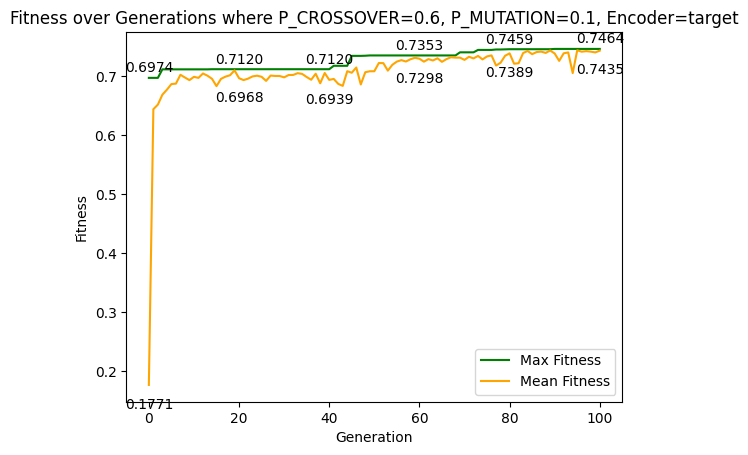

,gen,avg,std,min,max
0,0,0.177077,0.641279,-1.000000,0.697356
1,1,0.644251,0.084222,0.335337,0.697356
2,2,0.652039,0.088843,0.301683,0.697356
3,3,0.668832,0.171435,-1.000000,0.711779
4,4,0.677291,0.074355,0.357692,0.711779
5,5,0.686844,0.060365,0.335337,0.711779
6,6,0.687541,0.071011,0.310817,0.711779
7,7,0.702567,0.050177,0.355529,0.711779
8,8,0.697940,0.052182,0.355529,0.711779
9,9,0.693524,0.068630,0.355529,0.711779


-------------- GUESS 2 --------------


Currently on run 1 of 20
The execution time is 171.4113838672638 seconds.
-- Best Individual =  add(protectedDiv(mul(logical_or(lt(logical_and(ARG2, pexp(ARG3)), ARG8), protectedDiv(mul(logical_or(lt(logical_and(ARG8, pexp(ARG8)), ARG8), ARG3), ARG1), ARG7)), ARG1), ARG7), mul(mul(ARG8, logical_or(lt(ARG8, mul(logical_or(lt(logical_and(pexp(ARG3), pexp(ARG3)), ARG8), ARG3), ARG1)), ARG3)), ARG8))
Maximum fitness achieved:  0.786298076923077
Validation Accuracy:       0.8028846153846154
CSV file saved to: F:/Nextcloud/University/Sem1/CS6271 EVOLUTIONARY COMPUTATION AND HUMANOID ROBOTICS/kaggle_submissions/kaggle_submission__f=0.786298076923077_v=0.8028846153846154.csv


Currently on run 2 of 20
The execution time is 310.9383661746979 seconds.
-- Best Individual =  add(protectedDiv(mul(logical_or(lt(logical_and(pexp(ARG3), pexp(neg(psin(ARG2)))), ARG8), protectedDiv(mul(logical_or(lt(logical_and(ARG8, pexp(logical_or(lt(sub(ARG6, ARG2), ARG8), prot

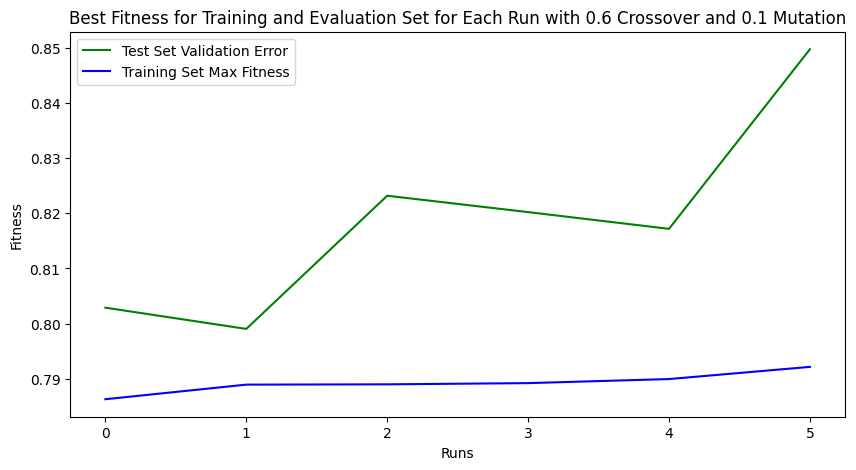


------------------------------------
Best Individual: add(protectedDiv(mul(logical_or(lt(logical_and(0.5837252204775573, pexp(neg(psin(ARG2)))), ARG8), protectedDiv(mul(logical_or(lt(logical_and(ARG2, pexp(logical_or(lt(sub(ARG6, ARG2), ARG1), protectedDiv(mul(mul(lt(ARG3, psin(psin(ARG2))), for_loop(logical_or(ARG0, ARG9), pexp(ARG3), add(ARG1, ARG7))), ARG1), ARG7)))), ARG1), ARG3), ARG1), mul(ARG9, ARG7))), ARG1), logical_or(ARG0, ARG9)), mul(mul(ARG8, logical_or(lt(ARG8, logical_or(lt(logical_and(logical_or(logical_and(logical_or(logical_and(pexp(neg(psin(ARG2))), pexp(pexp(for_loop(gt(ARG0, ARG1), logical_and(ARG2, ARG8), mul(ARG7, ARG6))))), psin(ARG2)), ARG7), protectedDiv(mul(neg(0.5837252204775573), ARG1), for_loop(ARG7, pexp(ARG3), add(ARG1, mul(lt(ARG3, psin(ARG2)), ARG1))))), pexp(ARG3)), ARG1), ARG3)), mul(lt(ARG3, psin(ARG2)), for_loop(logical_or(ARG0, ARG9), lt(logical_and(logical_or(logical_and(logical_or(logical_and(pexp(neg(psin(ARG2))), pexp(pexp(for_loop(gt(ARG0, A

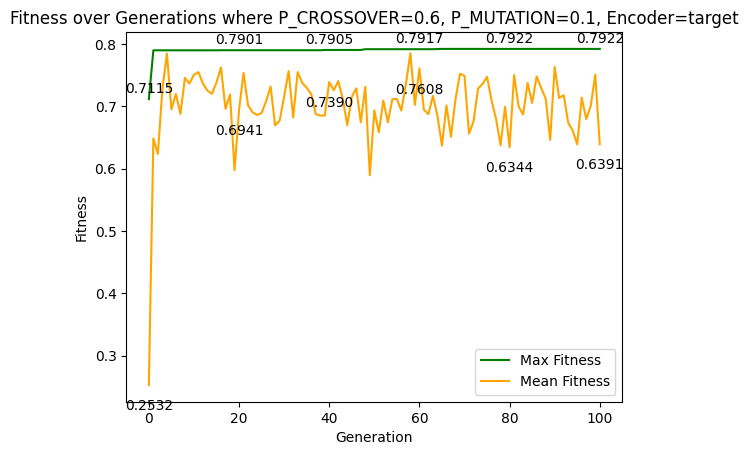

,gen,avg,std,min,max
0,0,0.253195,0.621924,-1.000000,0.711538
1,1,0.648379,0.181804,-1.000000,0.789951
2,2,0.623631,0.381907,-1.000000,0.789951
3,3,0.727379,0.256349,-1.000000,0.789951
4,4,0.784595,0.019366,0.663971,0.789951
5,5,0.695137,0.389463,-1.000000,0.789951
6,6,0.719835,0.309309,-1.000000,0.789951
7,7,0.688039,0.389922,-1.000000,0.789951
8,8,0.745547,0.195069,-1.000000,0.789951
9,9,0.736663,0.255426,-1.000000,0.789951


-------------- GUESS 3 --------------


Currently on run 1 of 20
The execution time is 143.76260566711426 seconds.
-- Best Individual =  sub(for_loop(for_loop(for_loop(ARG8, 0.47400064428442934, ARG8), 0.3905674456314433, neg(ARG2)), pow2(pow2(ARG1)), ARG8), neg(ARG2))
Maximum fitness achieved:  0.7658670664667666
Validation Accuracy:       0.8126293995859213
CSV file saved to: F:/Nextcloud/University/Sem1/CS6271 EVOLUTIONARY COMPUTATION AND HUMANOID ROBOTICS/kaggle_submissions/kaggle_submission__f=0.7658670664667666_v=0.8126293995859213.csv

Delta between Training and Validation is too high. Exiting loop.

------------------------------------
Best Individual: sub(for_loop(for_loop(for_loop(ARG8, 0.47400064428442934, ARG8), 0.3905674456314433, neg(ARG2)), pow2(pow2(ARG1)), ARG8), neg(ARG2))
Fitness: 0.7658670664667666
------------------------------------

------------------------------------------------------------------


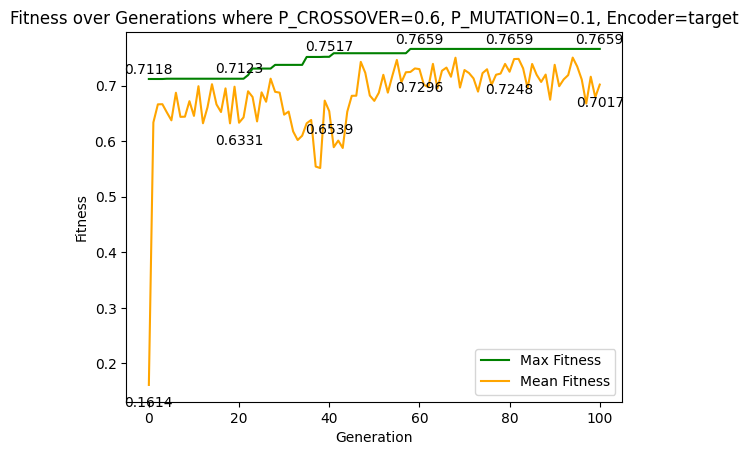

,gen,avg,std,min,max
0,0,0.161445,0.667324,-1.000000,0.711779
1,1,0.633579,0.104623,0.335337,0.711779
2,2,0.666175,0.170718,-1.000000,0.711779
3,3,0.666431,0.241698,-1.000000,0.711779
4,4,0.651565,0.293106,-1.000000,0.712260
5,5,0.637423,0.334672,-1.000000,0.712260
6,6,0.687089,0.172014,-1.000000,0.712260
7,7,0.643679,0.295672,-1.000000,0.712260
8,8,0.643956,0.252743,-1.000000,0.712260
9,9,0.671900,0.106534,0.309135,0.712260


-----------------RANDOM_SEED: 42------------------------
-----------------ENCODING METHOD: target-----------------
-----------------TRAIN_TEST_SPLIT: 0.2---------------
--------------------------------------------------------

Running GP with P_CROSSOVER: 0.6 and P_MUTATION: 0.3

 Max Generations: 100 

 Population Size: 100 

-------------- GUESS 1 --------------


Currently on run 1 of 20
The execution time is 278.1234769821167 seconds.
-- Best Individual =  for_loop(protectedDiv(logical_or(ARG1, ARG2), ARG0), logical_or(ARG1, ARG2), sub(ARG8, mul(sub(if_then_else(sub(ARG4, ARG9), add(ARG1, ARG1), ARG4), pcos(psin(ARG4))), logical_or(sub(sub(ARG8, mul(sub(if_then_else(sub(if_then_else(sub(ARG4, ARG0), add(ARG4, ARG1), ARG4), pexp(ARG1)), add(ARG4, ARG1), ARG4), pexp(ARG1)), logical_or(psin(lt(for_loop(ARG0, ARG5, ARG4), psin(ARG7))), ARG4))), mul(sub(gt(ARG9, ARG8), logical_or(sub(ARG8, mul(sub(if_then_else(sub(ARG4, logical_or(ARG1, ARG4)), sub(ARG1, ARG9), pexp(ARG1)), ARG8), logic

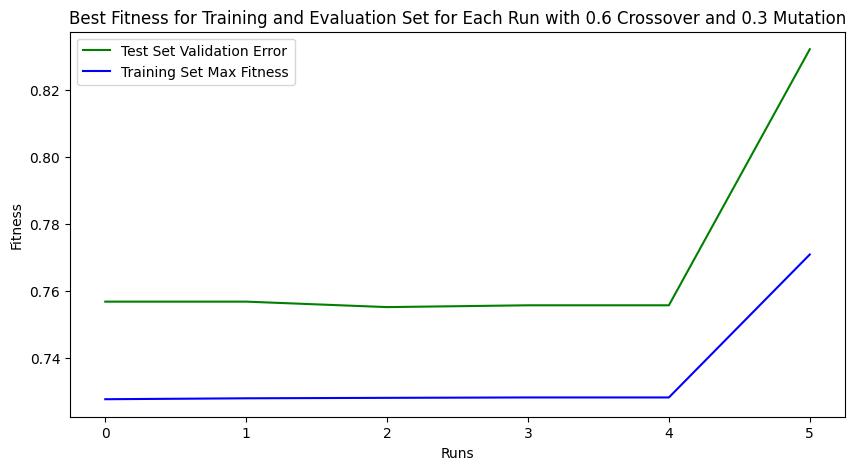


------------------------------------
Best Individual: psin(for_loop(logical_and(add(pexp(ARG1), sub(psin(mul(neg(pexp(ARG6)), ARG7)), ARG0)), pcos(psin(pexp(sub(ARG4, ARG9))))), for_loop(ARG3, protectedDiv(lt(ARG0, ARG3), psin(ARG1)), logical_or(ARG8, ARG2)), mul(pexp(logical_and(ARG8, ARG8)), ARG3)))
Fitness: 0.771002024291498
------------------------------------

------------------------------------------------------------------


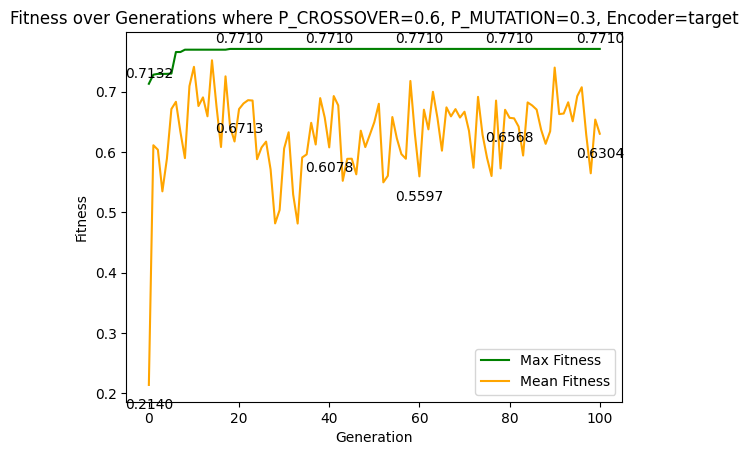

,gen,avg,std,min,max
0,0,0.213993,0.622920,-1.000000,0.713221
1,1,0.611323,0.250297,-1.000000,0.728330
2,2,0.603886,0.374393,-1.000000,0.729635
3,3,0.534909,0.539745,-1.000000,0.729635
4,4,0.588903,0.468592,-1.000000,0.729635
5,5,0.671413,0.297019,-1.000000,0.730183
6,6,0.683346,0.247172,-1.000000,0.765867
7,7,0.633340,0.379826,-1.000000,0.765867
8,8,0.589980,0.471243,-1.000000,0.769737
9,9,0.709350,0.251599,-1.000000,0.769737


-------------- GUESS 2 --------------


Currently on run 1 of 20
The execution time is 204.77315211296082 seconds.
-- Best Individual =  lt(lt(pow2(neg(neg(mul(add(if_then_else(pexp(sub(sub(ARG7, ARG7), add(ARG5, ARG8))), mul(add(neg(mul(ARG1, logical_and(logical_not(add(ARG8, ARG8)), mul(pcos(ARG3), add(ARG7, ARG8))))), sub(if_then_else(neg(mul(ARG7, logical_not(ARG7))), ARG6, ARG9), lt(ARG3, ARG0))), ARG8), mul(ARG0, ARG1)), ARG8), ARG8)))), ARG8), add(neg(neg(mul(ARG1, logical_and(add(neg(mul(ARG1, logical_and(logical_not(add(ARG8, ARG8)), ARG2))), lt(ARG7, ARG3)), ARG1)))), ARG8))
Maximum fitness achieved:  0.7685096153846154
Validation Accuracy:       0.7875
CSV file saved to: F:/Nextcloud/University/Sem1/CS6271 EVOLUTIONARY COMPUTATION AND HUMANOID ROBOTICS/kaggle_submissions/kaggle_submission__f=0.7685096153846154_v=0.7875.csv


Currently on run 2 of 20
The execution time is 335.32521653175354 seconds.
-- Best Individual =  lt(lt(pow2(neg(neg(mul(add(if_then_else(pexp(sub(ARG3, 

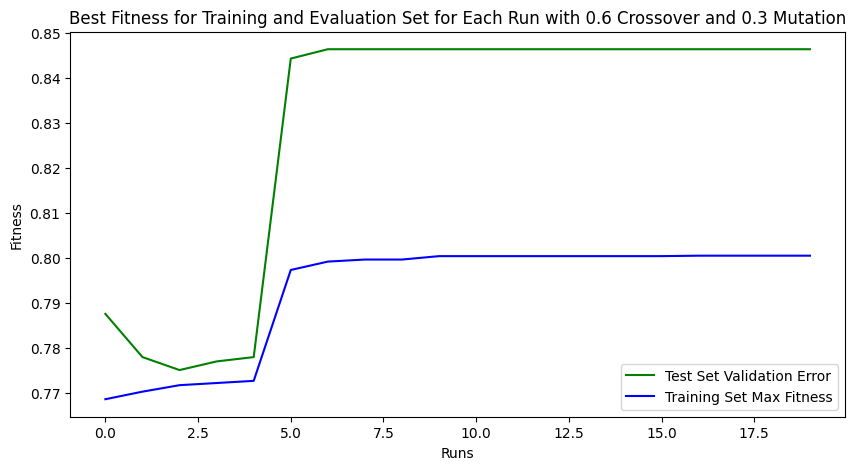


------------------------------------
Best Individual: lt(lt(pow2(neg(neg(mul(add(if_then_else(ARG8, mul(add(neg(mul(ARG6, mul(gt(ARG1, 0.34101515211566913), gt(pow2(ARG4), ARG3)))), sub(ARG9, lt(ARG3, ARG0))), ARG8), add(neg(mul(lt(add(0.3434118578921155, ARG1), ARG9), pow2(protectedDiv(sub(lt(add(0.3434118578921155, ARG1), ARG9), add(ARG0, 0.7900711054392738)), ARG1)))), pexp(for_loop(ARG3, pexp(logical_or(ARG0, pow2(ARG4))), add(ARG2, psin(sub(psin(0.1952089396453487), ARG8))))))), ARG8), ARG8)))), ARG8), add(neg(neg(mul(ARG1, logical_and(add(mul(logical_or(sub(sub(psin(lt(ARG3, ARG8)), ARG4), add(pcos(ARG9), pexp(logical_or(0.967234439344234, ARG4)))), for_loop(lt(ARG4, ARG8), if_then_else(ARG3, ARG5, ARG6), add(psin(sub(ARG3, ARG8)), psin(mul(sub(sub(gt(ARG5, ARG5), add(lt(ARG2, ARG9), pexp(ARG6))), add(pow2(logical_and(ARG7, ARG9)), pexp(ARG6))), pow2(ARG4)))))), sub(ARG7, ARG7)), lt(pexp(sub(sub(add(ARG0, 0.7900711054392738), pcos(if_then_else(pexp(ARG6), ARG6, ARG9))), add(lt(p

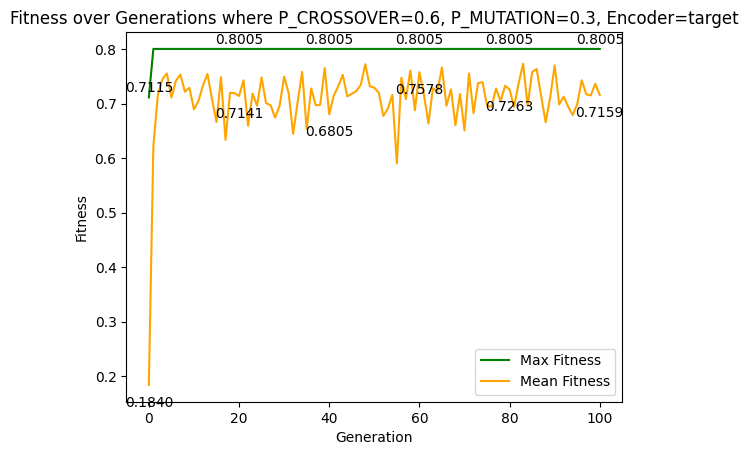

,gen,avg,std,min,max
0,0,0.183957,0.644742,-1.0,0.711538
1,1,0.622500,0.253271,-1.0,0.800455
2,2,0.716003,0.191554,-1.0,0.800455
3,3,0.744842,0.257213,-1.0,0.800455
4,4,0.755519,0.251638,-1.0,0.800455
5,5,0.711113,0.354837,-1.0,0.800455
6,6,0.742153,0.261625,-1.0,0.800455
7,7,0.753236,0.255032,-1.0,0.800455
8,8,0.721832,0.352073,-1.0,0.800455
9,9,0.729270,0.308656,-1.0,0.800455


-------------- GUESS 3 --------------


Currently on run 1 of 20
The execution time is 217.72084760665894 seconds.
-- Best Individual =  pow2(add(add(ARG1, pow2(add(logical_or(ARG2, pow2(ARG1)), pow2(pow2(sub(ARG8, pow2(add(logical_or(ARG2, pow2(pow2(for_loop(add(ARG2, pow2(ARG8)), ARG0, ARG0)))), pow2(pow2(ARG2)))))))))), pow2(mul(pcos(ARG7), pow2(pow2(sub(0.3227034235027757, pow2(add(logical_or(ARG2, if_then_else(logical_not(ARG9), pcos(ARG7), mul(ARG4, 0.6346998620998192))), pow2(pow2(add(ARG2, pow2(ARG8)))))))))))))
Maximum fitness achieved:  0.7894230769230769
Validation Accuracy:       0.801923076923077
CSV file saved to: F:/Nextcloud/University/Sem1/CS6271 EVOLUTIONARY COMPUTATION AND HUMANOID ROBOTICS/kaggle_submissions/kaggle_submission__f=0.7894230769230769_v=0.801923076923077.csv


Currently on run 2 of 20
The execution time is 396.2322268486023 seconds.
-- Best Individual =  pow2(add(add(ARG1, pow2(add(logical_or(ARG2, add(logical_or(ARG2, pow2(pow2(for_loop(add(ARG2, pow2(

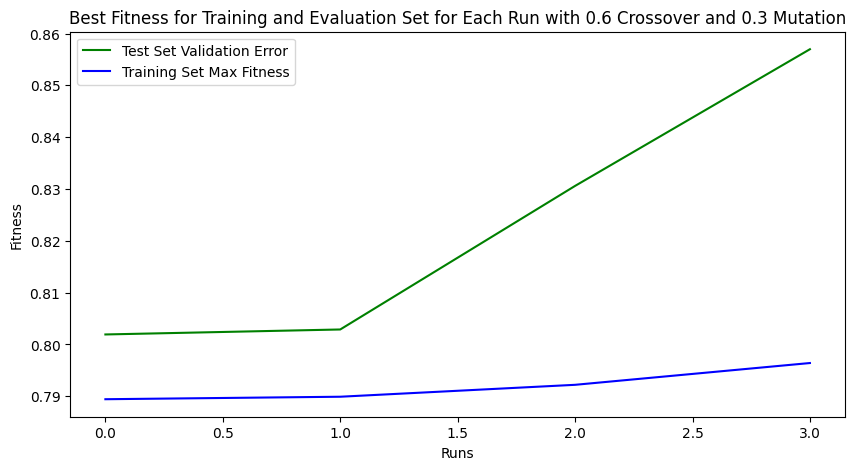


------------------------------------
Best Individual: pow2(add(add(ARG1, pow2(add(logical_or(ARG2, add(logical_or(logical_or(pow2(neg(ARG0)), ARG1), pow2(pow2(for_loop(add(ARG8, ARG2), logical_or(ARG3, ARG0), protectedDiv(ARG2, if_then_else(logical_and(logical_and(ARG7, ARG8), gt(ARG6, ARG1)), pcos(add(ARG6, ARG9)), mul(ARG8, 0.6346998620998192))))))), pow2(ARG3))), pow2(pow2(sub(ARG8, pow2(add(logical_or(ARG3, pow2(ARG3)), pow2(pow2(logical_or(ARG2, ARG6))))))))))), pow2(mul(pcos(logical_and(logical_and(logical_or(ARG3, pow2(mul(ARG8, 0.6346998620998192))), ARG4), add(ARG6, logical_and(logical_and(logical_or(ARG3, ARG6), ARG4), add(add(ARG6, ARG9), for_loop(add(ARG8, ARG2), logical_or(ARG3, pow2(pow2(for_loop(ARG9, ARG0, ARG0)))), protectedDiv(ARG2, if_then_else(logical_and(ARG2, gt(pow2(logical_and(ARG5, ARG4)), ARG1)), pcos(add(ARG6, ARG9)), mul(ARG8, 0.6346998620998192))))))))), pow2(pow2(ARG8))))))
Fitness: 0.7964087000505817
------------------------------------

----------------

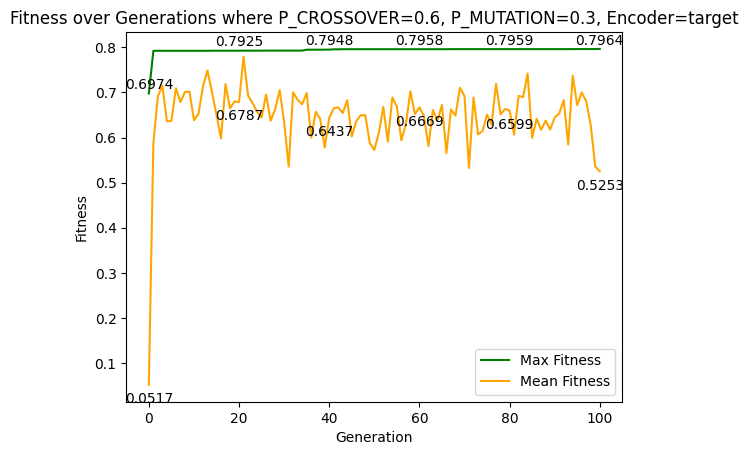

,gen,avg,std,min,max
0,0,0.051708,0.700365,-1.000000,0.697356
1,1,0.587624,0.339658,-1.000000,0.792205
2,2,0.691448,0.196738,-1.000000,0.792205
3,3,0.714875,0.263558,-1.000000,0.792205
4,4,0.635982,0.458941,-1.000000,0.792205
5,5,0.637020,0.402394,-1.000000,0.792205
6,6,0.709278,0.313920,-1.000000,0.792205
7,7,0.678569,0.359936,-1.000000,0.792205
8,8,0.700898,0.316101,-1.000000,0.792205
9,9,0.701974,0.313187,-1.000000,0.792205


-----------------RANDOM_SEED: 42------------------------
-----------------ENCODING METHOD: target-----------------
-----------------TRAIN_TEST_SPLIT: 0.2---------------
--------------------------------------------------------

Running GP with P_CROSSOVER: 0.7 and P_MUTATION: 0.01

 Max Generations: 100 

 Population Size: 100 

-------------- GUESS 1 --------------


Currently on run 1 of 20
The execution time is 112.60806369781494 seconds.
-- Best Individual =  logical_and(pcos(ARG3), if_then_else(ARG6, ARG8, ARG7))
Maximum fitness achieved:  0.7117788461538461
Validation Accuracy:       0.7019230769230769
CSV file saved to: F:/Nextcloud/University/Sem1/CS6271 EVOLUTIONARY COMPUTATION AND HUMANOID ROBOTICS/kaggle_submissions/kaggle_submission__f=0.7117788461538461_v=0.7019230769230769.csv

Runs did not achieve validation of 0.75. Exiting loop.

------------------------------------
Best Individual: logical_and(pcos(ARG3), if_then_else(ARG6, ARG8, ARG7))
Fitness: 0.7117788461538461
----

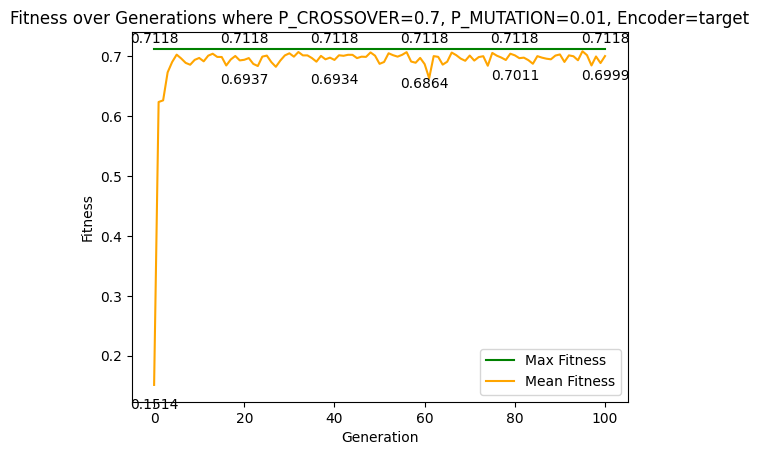

,gen,avg,std,min,max
0,0,0.151356,0.677457,-1.000000,0.711779
1,1,0.623253,0.184761,-1.000000,0.711779
2,2,0.625982,0.250674,-1.000000,0.711779
3,3,0.672688,0.097593,0.335337,0.711779
4,4,0.689918,0.079572,0.335337,0.711779
5,5,0.702257,0.039770,0.344231,0.711779
6,6,0.695892,0.064683,0.335337,0.711779
7,7,0.688495,0.085815,0.344231,0.711779
8,8,0.685416,0.087239,0.335337,0.711779
9,9,0.693524,0.062395,0.357692,0.711779


-------------- GUESS 2 --------------


Currently on run 1 of 20
The execution time is 543.5871117115021 seconds.
-- Best Individual =  neg(protectedDiv(protectedDiv(protectedDiv(psin(gt(ARG3, ARG0)), mul(ARG5, for_loop(ARG8, 0.5565132281073155, for_loop(ARG5, 0.5565132281073155, ARG8)))), pexp(pow2(logical_and(add(logical_not(ARG3), lt(if_then_else(ARG9, ARG8, ARG1), ARG1)), ARG6)))), sub(if_then_else(add(logical_not(protectedDiv(neg(ARG2), mul(logical_not(ARG3), for_loop(ARG5, 0.5565132281073155, ARG7)))), lt(ARG0, ARG1)), logical_or(logical_and(logical_not(for_loop(pow2(psin(ARG8)), 0.5565132281073155, for_loop(ARG5, 0.5565132281073155, ARG8))), ARG8), neg(ARG2)), pcos(gt(pcos(ARG9), ARG0))), mul(ARG8, psin(gt(gt(pcos(ARG9), ARG0), ARG0))))))
Maximum fitness achieved:  0.7786106946526736
Validation Accuracy:       0.8250517598343685
CSV file saved to: F:/Nextcloud/University/Sem1/CS6271 EVOLUTIONARY COMPUTATION AND HUMANOID ROBOTICS/kaggle_submissions/kaggle_submission__f=0.77861069

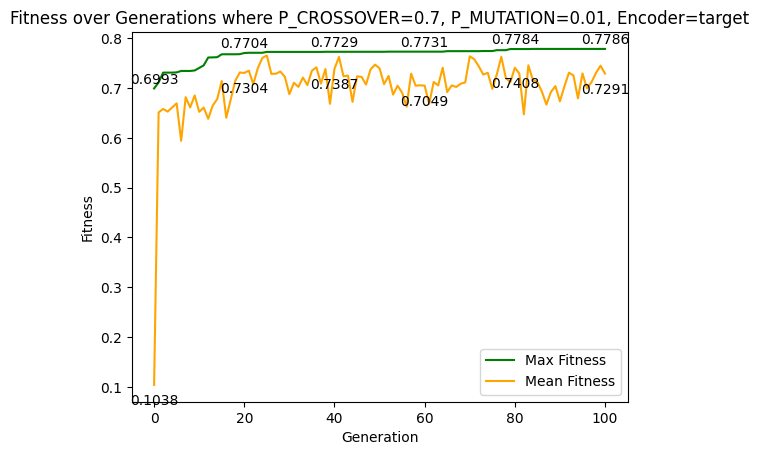

,gen,avg,std,min,max
0,0,0.103788,0.699503,-1.000000,0.699279
1,1,0.651214,0.072847,0.335337,0.711298
2,2,0.658109,0.179758,-1.000000,0.731010
3,3,0.652674,0.241888,-1.000000,0.731010
4,4,0.660991,0.241770,-1.000000,0.731010
5,5,0.669286,0.245507,-1.000000,0.731490
6,6,0.594043,0.438478,-1.000000,0.734375
7,7,0.681736,0.242885,-1.000000,0.734375
8,8,0.661139,0.294540,-1.000000,0.734375
9,9,0.685175,0.242987,-1.000000,0.735337


-------------- GUESS 3 --------------


Currently on run 1 of 20
The execution time is 152.4781141281128 seconds.
-- Best Individual =  logical_and(pcos(ARG5), for_loop(ARG3, logical_or(ARG1, for_loop(ARG3, ARG8, ARG2)), ARG8))
Maximum fitness achieved:  0.7148925537231384
Validation Accuracy:       0.7349896480331263
CSV file saved to: F:/Nextcloud/University/Sem1/CS6271 EVOLUTIONARY COMPUTATION AND HUMANOID ROBOTICS/kaggle_submissions/kaggle_submission__f=0.7148925537231384_v=0.7349896480331263.csv

Runs did not achieve validation of 0.75. Exiting loop.

------------------------------------
Best Individual: logical_and(pcos(ARG5), for_loop(ARG3, logical_or(ARG1, for_loop(ARG3, ARG8, ARG2)), ARG8))
Fitness: 0.7148925537231384
------------------------------------

------------------------------------------------------------------


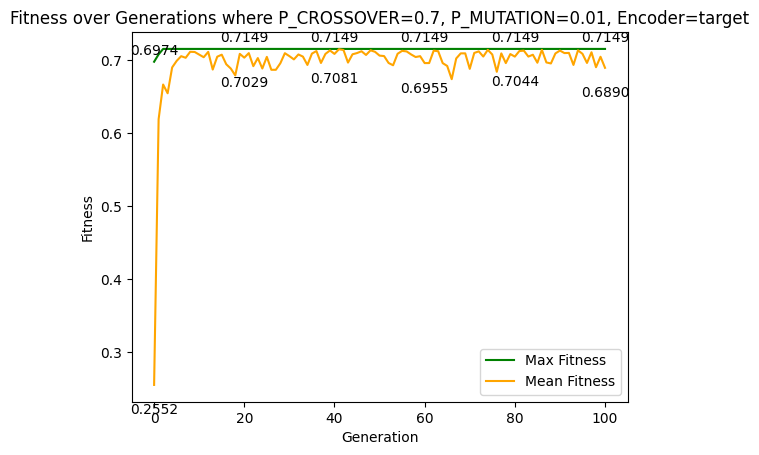

,gen,avg,std,min,max
0,0,0.255193,0.605357,-1.000000,0.697356
1,1,0.618765,0.241648,-1.000000,0.707452
2,2,0.666174,0.070452,0.308894,0.714893
3,3,0.654206,0.187851,-1.000000,0.714893
4,4,0.689558,0.071489,0.335337,0.714893
5,5,0.698500,0.058376,0.335337,0.714893
6,6,0.704962,0.039234,0.335337,0.714893
7,7,0.702779,0.052543,0.309845,0.714893
8,8,0.710973,0.010397,0.664663,0.714893
9,9,0.710708,0.009796,0.664663,0.714893


-----------------RANDOM_SEED: 42------------------------
-----------------ENCODING METHOD: target-----------------
-----------------TRAIN_TEST_SPLIT: 0.2---------------
--------------------------------------------------------

Running GP with P_CROSSOVER: 0.7 and P_MUTATION: 0.1

 Max Generations: 100 

 Population Size: 100 

-------------- GUESS 1 --------------


Currently on run 1 of 20
The execution time is 426.8953833580017 seconds.
-- Best Individual =  lt(logical_and(pexp(logical_or(ARG8, 0.5985734834638474)), ARG0), logical_or(lt(psin(pexp(logical_or(lt(psin(ARG8), logical_or(ARG8, lt(ARG5, logical_and(pexp(ARG8), 0.5985734834638474)))), lt(pow2(protectedDiv(ARG0, ARG3)), ARG8)))), logical_and(logical_or(lt(psin(pexp(pexp(logical_or(lt(psin(0.5985734834638474), logical_or(ARG8, lt(ARG5, logical_and(logical_or(ARG8, ARG5), ARG0)))), ARG0)))), lt(psin(pexp(0.5985734834638474)), logical_or(logical_or(ARG8, ARG5), lt(ARG8, logical_and(pexp(lt(ARG5, 0.5985734834638474)), 0.59857348

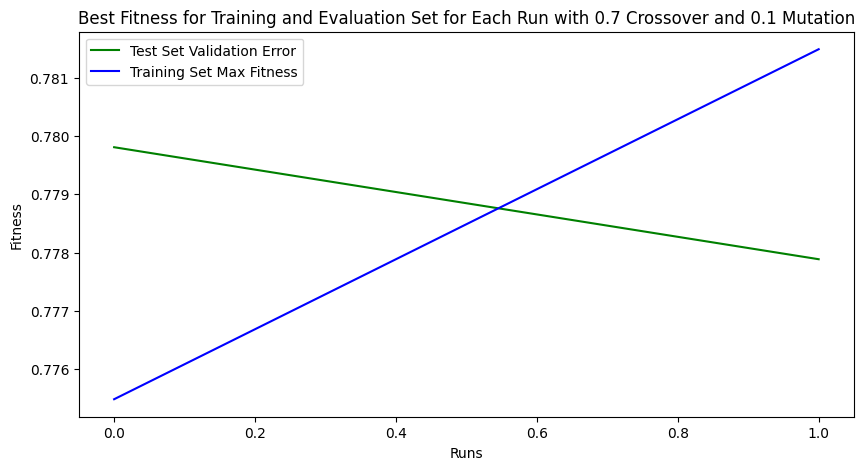


------------------------------------
Best Individual: lt(logical_and(pexp(logical_or(ARG8, 0.5985734834638474)), ARG0), logical_or(lt(psin(pexp(logical_or(ARG8, 0.5985734834638474))), logical_and(logical_or(lt(psin(pexp(pexp(logical_or(lt(psin(0.5985734834638474), logical_or(ARG8, ARG8)), pexp(ARG3))))), 0.5985734834638474), lt(pow2(protectedDiv(ARG5, ARG3)), ARG8)), logical_or(lt(psin(pexp(logical_or(lt(psin(0.5985734834638474), logical_or(ARG8, protectedDiv(ARG5, ARG7))), lt(pow2(lt(ARG8, logical_and(pexp(ARG8), 0.5985734834638474))), lt(ARG5, logical_and(pexp(ARG8), 0.5985734834638474)))))), logical_and(logical_or(protectedDiv(ARG5, ARG7), lt(pow2(ARG0), gt(add(ARG7, ARG6), ARG3))), 0.5985734834638474)), logical_and(logical_or(lt(psin(pexp(pexp(logical_or(lt(psin(0.5985734834638474), psin(logical_or(ARG0, ARG7))), pexp(logical_or(ARG8, 0.5985734834638474)))))), 0.5985734834638474), lt(pow2(protectedDiv(0.5985734834638474, ARG3)), ARG8)), logical_or(lt(psin(pexp(logical_or(lt(psin(p

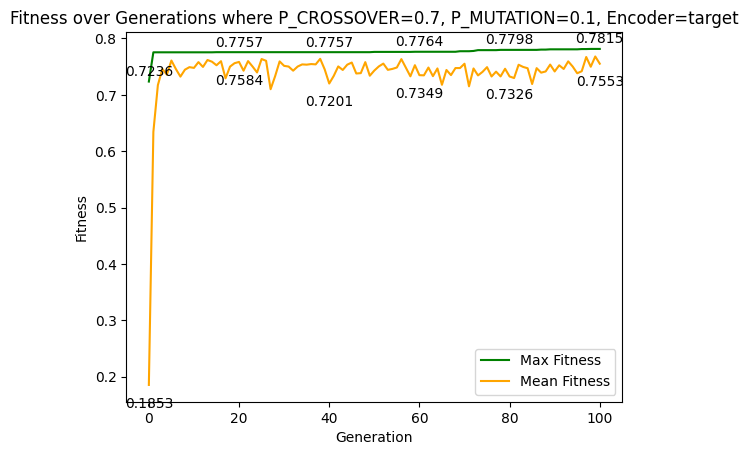

,gen,avg,std,min,max
0,0,0.185254,0.644530,-1.000000,0.723558
1,1,0.634252,0.189536,-1.000000,0.775481
2,2,0.717277,0.074072,0.335337,0.775481
3,3,0.746068,0.091725,0.335337,0.775481
4,4,0.735736,0.115034,0.339663,0.775481
5,5,0.760899,0.069896,0.323317,0.775481
6,6,0.745745,0.103118,0.277404,0.775481
7,7,0.732351,0.198884,-1.000000,0.775481
8,8,0.744663,0.099626,0.335337,0.775481
9,9,0.749159,0.096945,0.339663,0.775481


-------------- GUESS 2 --------------


Currently on run 1 of 20
The execution time is 525.0650043487549 seconds.
-- Best Individual =  if_then_else(mul(gt(gt(0.2901059797702773, ARG3), ARG8), ARG1), logical_and(mul(gt(0.2901059797702773, gt(0.2901059797702773, ARG3)), mul(gt(mul(gt(gt(0.2901059797702773, gt(protectedDiv(ARG1, ARG1), protectedDiv(ARG1, ARG0))), add(ARG2, ARG8)), add(ARG1, 0.7350606271032772)), mul(gt(0.2901059797702773, psin(ARG8)), gt(ARG1, ARG8))), ARG8)), gt(ARG3, ARG8)), ARG8)
Maximum fitness achieved:  0.7850961538461538
Validation Accuracy:       0.7990384615384616
CSV file saved to: F:/Nextcloud/University/Sem1/CS6271 EVOLUTIONARY COMPUTATION AND HUMANOID ROBOTICS/kaggle_submissions/kaggle_submission__f=0.7850961538461538_v=0.7990384615384616.csv


Currently on run 2 of 20
The execution time is 746.5092303752899 seconds.
-- Best Individual =  if_then_else(mul(gt(gt(0.2901059797702773, ARG3), ARG8), ARG1), logical_and(mul(gt(protectedDiv(ARG1, logical_and(mul(gt(

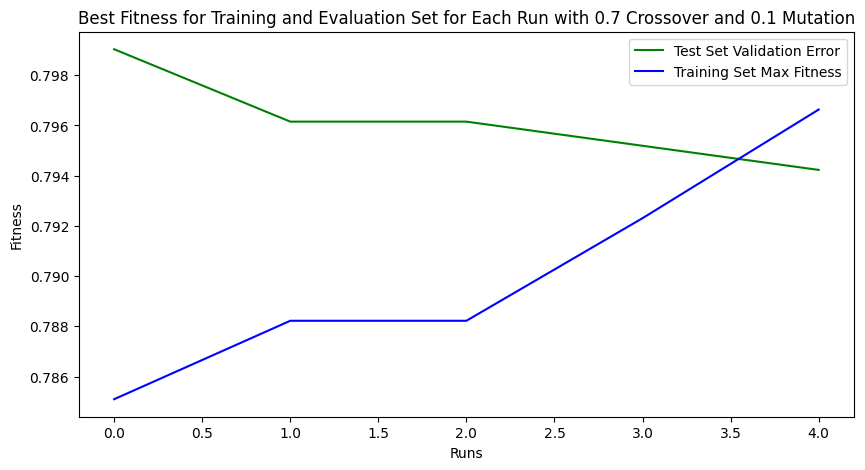


------------------------------------
Best Individual: if_then_else(mul(gt(gt(0.2901059797702773, ARG3), ARG8), 0.2901059797702773), logical_and(mul(gt(protectedDiv(ARG1, logical_and(mul(gt(0.2901059797702773, gt(0.2901059797702773, ARG3)), ARG8), 0.2901059797702773)), gt(mul(gt(mul(gt(ARG0, mul(ARG8, add(ARG0, ARG8))), add(ARG1, pow2(ARG6))), mul(gt(ARG0, gt(ARG4, ARG9)), ARG0)), gt(mul(gt(gt(0.2901059797702773, gt(protectedDiv(ARG1, mul(gt(protectedDiv(ARG1, ARG0), gt(protectedDiv(0.2901059797702773, ARG0), mul(pow2(ARG6), ARG2))), ARG8)), add(ARG1, pow2(ARG6)))), protectedDiv(ARG1, ARG0)), add(ARG1, gt(ARG0, mul(pow2(ARG6), ARG1)))), 0.2901059797702773)), mul(gt(gt(protectedDiv(ARG1, 0.2901059797702773), protectedDiv(add(ARG8, 0.7350606271032772), ARG0)), protectedDiv(ARG1, ARG0)), add(ARG1, 0.7350606271032772)))), gt(gt(mul(gt(protectedDiv(ARG1, logical_and(mul(0.2901059797702773, mul(gt(protectedDiv(ARG1, ARG0), mul(pow2(ARG6), ARG2)), ARG8)), gt(mul(gt(protectedDiv(0.735060627103

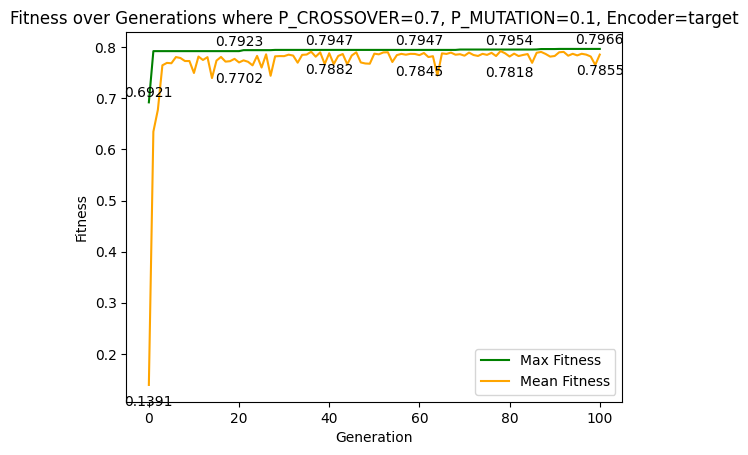

,gen,avg,std,min,max
0,0,0.139092,0.687223,-1.000000,0.692067
1,1,0.634700,0.192245,-1.000000,0.792308
2,2,0.677586,0.253803,-1.000000,0.792308
3,3,0.764528,0.063800,0.352885,0.792308
4,4,0.769293,0.062254,0.352885,0.792308
5,5,0.768599,0.050138,0.408413,0.792308
6,6,0.780679,0.049648,0.352885,0.792308
7,7,0.778861,0.031457,0.655288,0.792308
8,8,0.772959,0.052914,0.352885,0.792308
9,9,0.772930,0.052197,0.347596,0.792308


-------------- GUESS 3 --------------


Currently on run 1 of 20
The execution time is 258.66679763793945 seconds.
-- Best Individual =  psin(for_loop(ARG8, logical_and(protectedDiv(pow2(gt(logical_or(ARG3, ARG2), ARG7)), ARG1), protectedDiv(pow2(gt(logical_or(ARG3, ARG2), ARG7)), ARG1)), logical_and(protectedDiv(pow2(gt(ARG2, 0.3045376517224826)), 0.3045376517224826), for_loop(logical_or(ARG3, ARG2), for_loop(ARG8, ARG1, ARG8), ARG8))))
Maximum fitness achieved:  0.7671164417791104
Validation Accuracy:       0.8146997929606625
CSV file saved to: F:/Nextcloud/University/Sem1/CS6271 EVOLUTIONARY COMPUTATION AND HUMANOID ROBOTICS/kaggle_submissions/kaggle_submission__f=0.7671164417791104_v=0.8146997929606625.csv

Delta between Training and Validation is too high. Exiting loop.

------------------------------------
Best Individual: psin(for_loop(ARG8, logical_and(protectedDiv(pow2(gt(logical_or(ARG3, ARG2), ARG7)), ARG1), protectedDiv(pow2(gt(logical_or(ARG3, ARG2), ARG7)), ARG1)), logica

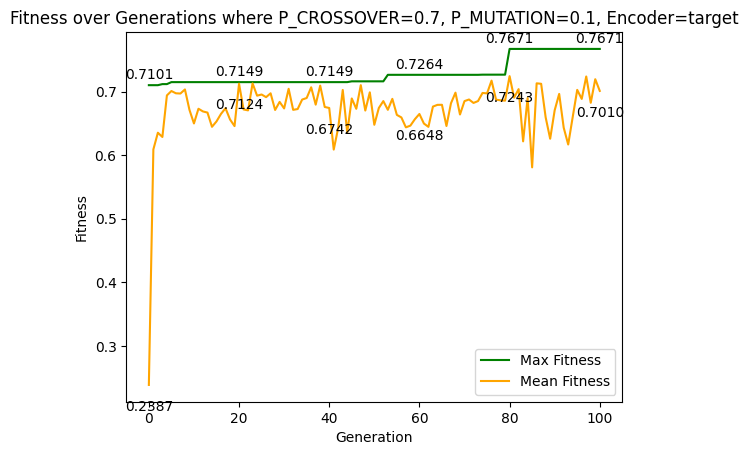

,gen,avg,std,min,max
0,0,0.238655,0.616898,-1.000000,0.710096
1,1,0.609066,0.247485,-1.000000,0.710096
2,2,0.635306,0.247180,-1.000000,0.710096
3,3,0.628631,0.334560,-1.000000,0.711779
4,4,0.694011,0.055183,0.335337,0.711779
5,5,0.700894,0.048893,0.335337,0.714893
6,6,0.697329,0.056497,0.335337,0.714893
7,7,0.696957,0.066160,0.310817,0.714893
8,8,0.703381,0.038859,0.357692,0.714893
9,9,0.671368,0.241584,-1.000000,0.714893


-----------------RANDOM_SEED: 42------------------------
-----------------ENCODING METHOD: target-----------------
-----------------TRAIN_TEST_SPLIT: 0.2---------------
--------------------------------------------------------

Running GP with P_CROSSOVER: 0.7 and P_MUTATION: 0.3

 Max Generations: 100 

 Population Size: 100 

-------------- GUESS 1 --------------


Currently on run 1 of 20
The execution time is 491.91477251052856 seconds.
-- Best Individual =  if_then_else(if_then_else(pcos(pow2(sub(sub(for_loop(sub(neg(ARG3), ARG1), ARG6, protectedDiv(add(pcos(gt(pexp(ARG2), ARG0)), mul(ARG4, ARG9)), ARG8)), pcos(gt(ARG1, ARG0))), ARG1))), lt(sub(neg(ARG3), ARG1), protectedDiv(sub(ARG3, pcos(gt(ARG1, ARG0))), logical_or(pow2(ARG1), logical_or(logical_or(psin(for_loop(add(ARG0, ARG5), ARG6, protectedDiv(add(ARG0, ARG2), ARG8))), sub(ARG7, ARG0)), ARG3)))), logical_or(ARG6, logical_or(pow2(ARG1), logical_or(logical_or(psin(for_loop(add(ARG0, ARG0), pcos(gt(neg(ARG2), ARG0)), protectedD

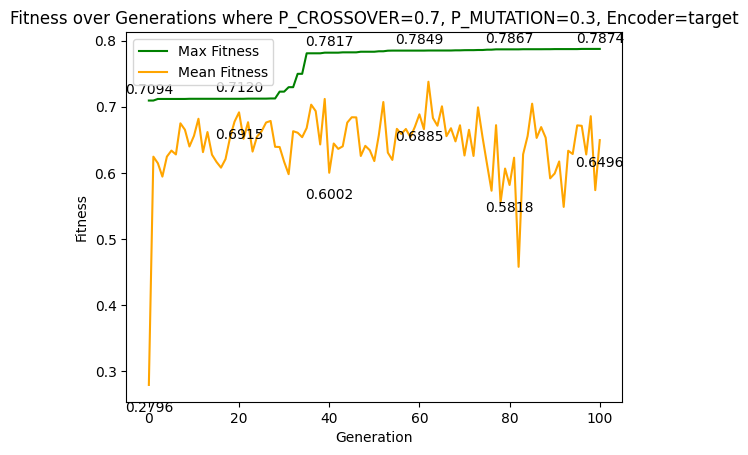

,gen,avg,std,min,max
0,0,0.279591,0.557283,-1.000000,0.709375
1,1,0.624550,0.186687,-1.000000,0.709375
2,2,0.614609,0.255719,-1.000000,0.711779
3,3,0.594423,0.339163,-1.000000,0.711779
4,4,0.624625,0.298674,-1.000000,0.711779
5,5,0.633731,0.256644,-1.000000,0.711779
6,6,0.627923,0.334730,-1.000000,0.711779
7,7,0.674962,0.178124,-1.000000,0.711779
8,8,0.665236,0.243690,-1.000000,0.711779
9,9,0.639928,0.296077,-1.000000,0.712019


-------------- GUESS 2 --------------


Currently on run 1 of 20
The execution time is 444.38481283187866 seconds.
-- Best Individual =  mul(pow2(ARG1), add(add(logical_and(gt(ARG8, pcos(pow2(add(if_then_else(sub(ARG3, ARG8), psin(ARG2), protectedDiv(ARG7, sub(ARG2, ARG9))), ARG2)))), add(add(gt(ARG3, ARG1), ARG8), add(add(sub(add(ARG4, ARG8), ARG2), add(logical_and(gt(ARG8, pcos(pow2(add(if_then_else(sub(ARG3, ARG8), psin(ARG2), protectedDiv(ARG7, sub(ARG2, ARG9))), ARG2)))), add(add(ARG4, ARG8), add(add(sub(add(ARG4, ARG8), protectedDiv(ARG4, neg(ARG2))), logical_and(gt(ARG0, psin(ARG1)), ARG9)), gt(ARG2, pow2(ARG1))))), ARG8)), gt(add(ARG4, ARG8), pow2(add(if_then_else(sub(ARG3, ARG8), psin(ARG2), logical_not(psin(0.873564787569756))), ARG2)))))), ARG8), add(add(ARG2, logical_and(gt(ARG3, ARG7), add(logical_or(ARG6, ARG5), add(add(sub(ARG9, pow2(ARG1)), logical_and(gt(ARG2, ARG7), ARG9)), gt(pexp(pow2(ARG0)), gt(ARG2, add(gt(add(sub(ARG9, pow2(ARG1)), logical_and(gt(ARG2, ARG7), ARG

In [ ]:
best_individual_per_parameter_set = []
best_individual_per_guess = []
best = None
best_fitness = 0
best_individual_overall = None

exit_runs = False

for p_crossover in p_crossover_values : #np.arange(0.3, 1, 0.1):
    for p_mutation in p_mutation_values : #np.arange(0.01, 0.4, 0.1):
        print(f"-----------------RANDOM_SEED: {RANDOM_SEED}------------------------")
        print(f"-----------------ENCODING METHOD: {ENCODING_METHOD}-----------------")
        print(f"-----------------TRAIN_TEST_SPLIT: {TEST_TRAIN_SPLIT}---------------")
        print(f"--------------------------------------------------------")
        print(f"\nRunning GP with P_CROSSOVER: {p_crossover} and P_MUTATION: {p_mutation}")
        print(f"\n Max Generations: {MAX_GENERATIONS} ")
        print(f"\n Population Size: {POPULATION_SIZE} \n")

        for _ in range(N_GUESSES):
            print(f"-------------- GUESS {_+1} --------------")
            hof, avgListFitness, avgListSize, maxFitnessValues, meanFitnessValues, gp_execution_time, exit_runs, results = gp_algorithm(
                                        p_crossover,
                                        p_mutation)
            print(f"\n------------------------------------")
            print("Best Individual: " + str(hof.items[0]))
            print("Fitness: " + str(hof.items[0].fitness.values[0]))
            print(f"------------------------------------\n")
            best = hof.items[0]
            best_individual_per_guess.append(hof.items[0])

            print(f"------------------------------------------------------------------")
            best_fitness_max = best_fitness
            plt.plot(maxFitnessValues, color='green', label='Max Fitness')
            plt.plot(meanFitnessValues, color='orange', label='Mean Fitness')

            # Adding values at specific generations
            specific_generations = [0, 20, 40, 60, 80, 100]
            for gen in specific_generations:
                plt.text(gen, maxFitnessValues[gen] + 0.01, f"{maxFitnessValues[gen]:.4f}", ha='center')
                plt.text(gen, meanFitnessValues[gen] - 0.04, f"{meanFitnessValues[gen]:.4f}", ha='center')

            plt.xlabel('Generation')
            plt.ylabel('Fitness')
            plt.title(
                'Fitness over Generations where P_CROSSOVER=' + str(p_crossover) +
                ', P_MUTATION=' + str(p_mutation) + ', Encoder=' + str(ENCODING_METHOD))
            plt.legend()
            plt.show()

            display(HTML(results.to_html()))

            if exit_runs:
                break

        for individual in best_individual_per_guess:
            if best_individual_overall is None or individual.fitness.values[0] > best_fitness:
                best_fitness = individual.fitness.values[0]
                best_individual_overall = individual

        #Add the best individual for this parameter set to the list
        best_individual_per_parameter_set.append((p_crossover, p_mutation, best_individual_overall))
